In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive//MyDrive/Colab Notebooks/Datasets/Kaggle/playground-series-s4e12

/content/drive/MyDrive/Colab Notebooks/Datasets/Kaggle/playground-series-s4e12


# Explore data

In [ ]:
train = pd.read_csv("./train.csv")
X_test = pd.read_csv("./test.csv")
y_test = pd.read_csv("./sample_submission.csv")

In [ ]:
train.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
train.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [ ]:
predictor = [x for x in train.columns if x not in X_test.columns]
predictor

['Premium Amount']

In [ ]:
train['Premium Amount'].describe()

,Premium Amount
count,1.200000e+06
mean,1.102545e+03
std,8.649989e+02
min,2.000000e+01
25%,5.140000e+02
50%,8.720000e+02
75%,1.509000e+03
max,4.999000e+03


In [ ]:
X_test.isnull().sum()

,0
id,0
Age,12489
Gender,0
Annual Income,29860
Marital Status,12336
Number of Dependents,73130
Education Level,0
Occupation,239125
Health Score,49449
Location,0


In [ ]:
# Example
train.iloc[1]

,1
id,1
Age,39.0
Gender,Female
Annual Income,31678.0
Marital Status,Divorced
Number of Dependents,3.0
Education Level,Master's
Occupation,NaN
Health Score,15.569731
Location,Rural


In [ ]:
df = pd.concat([train, X_test])
df.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
df.set_index('id')

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo,NaN
1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment,NaN
1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment,NaN


In [ ]:
# List values of categorical columns (except Policy Start Date)
cat_columns = df.select_dtypes(include = 'object').columns

for col in cat_columns:
    if col != 'Policy Start Date':
        print(f'Column {col} has {len(set(df[col]))} values: [{set(df[col])}]')

Column Gender has 2 values: [{'Female', 'Male'}]
Column Marital Status has 4 values: [{'Married', 'Single', 'Divorced', nan}]
Column Education Level has 4 values: [{"Master's", 'High School', "Bachelor's", 'PhD'}]
Column Occupation has 4 values: [{'Unemployed', 'Self-Employed', 'Employed', nan}]
Column Location has 3 values: [{'Urban', 'Suburban', 'Rural'}]
Column Policy Type has 3 values: [{'Comprehensive', 'Basic', 'Premium'}]
Column Customer Feedback has 4 values: [{'Average', 'Good', 'Poor', nan}]
Column Smoking Status has 2 values: [{'Yes', 'No'}]
Column Exercise Frequency has 4 values: [{'Weekly', 'Monthly', 'Daily', 'Rarely'}]
Column Property Type has 3 values: [{'Apartment', 'House', 'Condo'}]


In [ ]:
print(f"Date range: [{df['Policy Start Date'].min()} - {df['Policy Start Date'].max()}]")

Date range: [2019-08-17 15:21:39.080371 - 2024-08-15 15:21:39.287115]


<Axes: title={'center': 'Premium Amount'}, xlabel='Marital Status'>

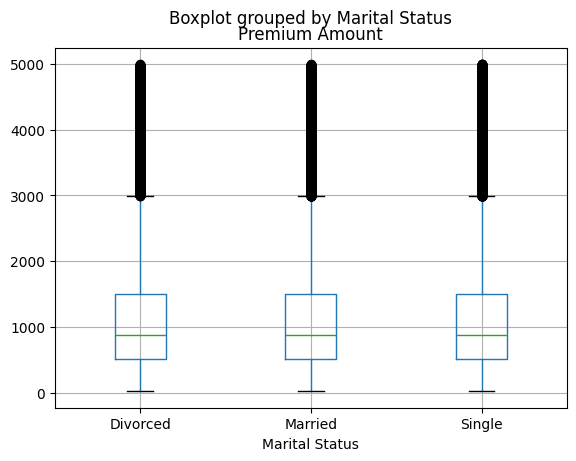

In [ ]:
train.boxplot(column = 'Premium Amount', by = 'Marital Status')

<Axes: title={'center': 'Premium Amount'}, xlabel='Smoking Status'>

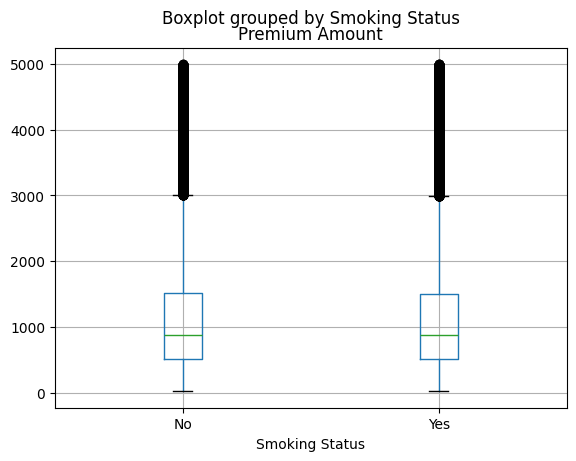

In [ ]:
train.boxplot(column = 'Premium Amount', by = 'Smoking Status')

In [ ]:
# sb.regplot(data = train, x = 'Annual Income', y = 'Premium Amount')

array([[<Axes: xlabel='Premium Amount', ylabel='Premium Amount'>,
        <Axes: xlabel='Health Score', ylabel='Premium Amount'>,
        <Axes: xlabel='Credit Score', ylabel='Premium Amount'>],
       [<Axes: xlabel='Premium Amount', ylabel='Health Score'>,
        <Axes: xlabel='Health Score', ylabel='Health Score'>,
        <Axes: xlabel='Credit Score', ylabel='Health Score'>],
       [<Axes: xlabel='Premium Amount', ylabel='Credit Score'>,
        <Axes: xlabel='Health Score', ylabel='Credit Score'>,
        <Axes: xlabel='Credit Score', ylabel='Credit Score'>]],
      dtype=object)

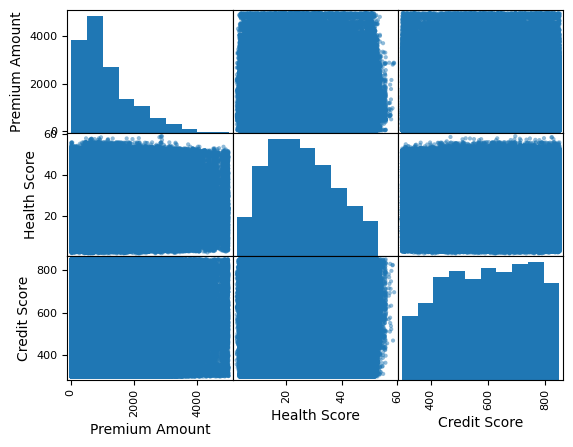

In [ ]:
pd.plotting.scatter_matrix(train[['Premium Amount', 'Health Score', 'Credit Score']])

Hypothesis: The data distributed in a way that when casting onto 2D plane, it looks really 'dense'. Or the data in real world tends to be contributed by a lot of features.

# Feature engineering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Impute missing data

In [ ]:
df_num = train.select_dtypes(exclude = 'object')
df_cat = train.select_dtypes(include = 'object').drop('Policy Start Date', axis = 1)

for col in df_num.columns:
    df_num[col] = df_num[col].fillna(df_num[col].mean())
for col in df_num.columns:
    df_num[col] = (df_num[col] - df_num[col].mean()) / df_num[col].std()

df_cat = pd.get_dummies(df_cat, prefix_sep='_', dummy_na=False, drop_first=False)

train_processed = pd.concat([df_num, df_cat], axis = 1)

In [ ]:
# scaler = StandardScaler()
# train_processed = scaler.fit_transform(train_imputed)

## Trying PCA

In [ ]:
trainPCA = PCA().fit(train_processed)
train_PCAed = trainPCA.transform(train_processed)

In [ ]:
train_PCAed.std(0, ddof=1)

array([1.08985819e+00, 1.02150409e+00, 1.00309516e+00, 1.00215025e+00,
       1.00025378e+00, 9.99662186e-01, 9.97978664e-01, 9.96753992e-01,
       9.87505264e-01, 8.91065426e-01, 7.08233494e-01, 7.05976330e-01,
       5.79022736e-01, 5.78119528e-01, 5.77686691e-01, 5.76773412e-01,
       5.76675187e-01, 5.76343015e-01, 5.73376316e-01, 5.72026043e-01,
       5.60249527e-01, 5.56217215e-01, 5.03625597e-01, 5.03015089e-01,
       5.02761667e-01, 4.99709641e-01, 4.96738689e-01, 4.93805008e-01,
       4.85308087e-01, 4.81758561e-01, 2.64138242e-01, 1.41877136e-01,
       7.11393581e-02, 4.93319177e-16, 7.02684393e-16, 5.54236026e-16,
       4.60905821e-16, 9.33185232e-16, 3.95840903e-16, 5.88455269e-16])

In [ ]:
trainPCA.explained_variance_ratio_

array([7.26816126e-02, 6.38505709e-02, 6.15699558e-02, 6.14540134e-02,
       6.12216419e-02, 6.11492448e-02, 6.09434564e-02, 6.07939744e-02,
       5.96710125e-02, 4.85851731e-02, 3.06928695e-02, 3.04975428e-02,
       2.05152022e-02, 2.04512495e-02, 2.04206373e-02, 2.03561214e-02,
       2.03491887e-02, 2.03257527e-02, 2.01170395e-02, 2.00224018e-02,
       1.92064706e-02, 1.89309942e-02, 1.55203017e-02, 1.54826963e-02,
       1.54670997e-02, 1.52798829e-02, 1.50987343e-02, 1.49209182e-02,
       1.44118464e-02, 1.42018019e-02, 4.26920624e-03, 1.23171264e-03,
       3.09673792e-04, 1.17729146e-17, 7.64585983e-18, 5.24104330e-18,
       1.70233290e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

==> PCA worsen the problem

# Model training

## Start simple with Linear Regression

In [ ]:
!pip install ISLP
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 13.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ffb561742e69ac1d425e134bb651d1a7426e6d0c123fa6ea77efa9d31164d3b8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting

In [ ]:
X = train_processed.drop('Premium Amount', axis = 1)
y = train_processed['Premium Amount']

In [ ]:
X_ms = MS(X).fit_transform(train_processed)
model = sm.OLS(y, X_ms)
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Premium Amount   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     146.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:16:51   Log-Likelihood:            -1.7004e+06
No. Observations:             1200000   AIC:                         3.401e+06
Df Residuals:                 1199967   BIC:                         3.401e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                   -8.937e+10   4.82e+10     -1.854      0.064   -1.84e+11    5.11e+09
id                             -0.0002      0.001     -0.224      0.823      -0.002       0.002
Age                            -0.0025      0.001     -2.711      0.007      -0.004      -0.001
Annual Income                  -0.0215      0.001    -23.063      0.000      -0.023      -0.020
Number of Dependents           -0.0009      0.001     -1.032      0.302      -0.003       0.001
Health Score                    0.0151      0.001     16.530      0.000       0.013       0.017
Previous Claims                 0.0406      0.001     44.446      0.000       0.039       0.042
Vehicle Age                     0.0005      0.001      0.500      0.617      -0.001       0.002
Credit Score                   -0.0303      0.001    -32.650      0.000      -0.032      -0.028
Insurance Duration          -4.397e-05      0.001     -0.048      0.962      -0.002       0.002
Gender_Female                1.654e+11   8.92e+10      1.854      0.064   -9.45e+09     3.4e+11
Gender_Male                  1.654e+11   8.92e+10      1.854      0.064   -9.45e+09     3.4e+11
Marital Status_Divorced        -0.1372      0.008    -18.279      0.000      -0.152      -0.123
Marital Status_Married         -0.1380      0.008    -18.380      0.000      -0.153      -0.123
Marital Status_Single          -0.1363      0.008    -18.151      0.000      -0.151      -0.122
Education Level_Bachelor's  -8.595e+10   4.64e+10     -1.854      0.064   -1.77e+11    4.91e+09
Education Level_High School -8.595e+10   4.64e+10     -1.854      0.064   -1.77e+11    4.91e+09
Education Level_Master's    -8.595e+10   4.64e+10     -1.854      0.064   -1.77e+11    4.91e+09
Education Level_PhD         -8.595e+10   4.64e+10     -1.854      0.064   -1.77e+11    4.91e+09
Occupation_Employed             0.0157      0.003      6.245      0.000       0.011       0.021
Occupation_Self-Employed        0.0146      0.003      5.820      0.000       0.010       0.020
Occupation_Unemployed           0.0131      0.003      5.198      0.000       0.008       0.018
Location_Rural               7.006e+09   3.78e+09      1.854      0.064      -4e+08    1.44e+10
Location_Suburban            7.006e+09   3.78e+09      1.854      0.064      -4e+08    1.44e+10
Location_Urban               7.006e+09   3.78e+09      1.854      0.064      -4e+08    1.44e+10
Policy Type_Basic           -2.898e+10   1.56e+10     -1.854      0.064   -5.96e+10    1.66e+09
Policy Type_Comprehensive   -2.898e+10   1.56e+10     -1.854      0.064   -5.96e+10    1.66e+09
Policy Type_Premium         -2.898e+10   1.56e+10     -1.854      0.064   -5.96e+10    1.66e+09
Customer Feedback_Average      -0.1147      0.004    -29.159      0.000      -0.122      -0.107
Customer Fe

## Build pipeline

In [ ]:
train = train.set_index('id')

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe_attribs = train.select_dtypes(include = 'object').drop(['Policy Start Date', 'Customer Feedback'], axis=1).columns
ord_attribs = ['Customer Feedback']
num_attribs = train.select_dtypes(exclude = 'object').drop(['Premium Amount'], axis=1).columns

ohe_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
ord_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

preprocessing = ColumnTransformer([
    ('ohe', ohe_pipeline, ohe_attribs),
    ('ord', ord_pipeline, ord_attribs),
    ('num', num_pipeline, num_attribs),
])

In [ ]:
X = train.drop(['Policy Start Date', 'Premium Amount'], axis = 1)
y = train['Premium Amount']

## Try DecisionTreeRegression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtreg = make_pipeline(preprocessing, DecisionTreeRegressor())
dtreg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dty...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Customer Feedback']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
X_test = X_test.set_index('id')
y_test = y_test.set_index('id')

In [ ]:
from sklearn.metrics import root_mean_squared_log_error

y_pred = dtreg.predict(X_test)

In [ ]:
print(root_mean_squared_log_error(y_test, y_pred))

1.2033526382000068


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randReg = make_pipeline(preprocessing, RandomForestRegressor(max_depth = 12, bootstrap = True, max_samples = 0.1, random_state = 86))
randReg.fit(X, y) #not enough ram

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dty...
                                                  ['Customer Feedback']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=12, max_samples=0.1,
                                       random_state=86))])

In [ ]:
from sklearn.metrics import root_mean_squared_log_error

y_pred = randReg.predict(X_test)

In [ ]:
print(root_mean_squared_log_error(y_test, y_pred))

0.2383943710557827


In [ ]:
y_pred[0]

1480.6599180593953

In [ ]:
y_test.iloc[0]

,1200000
Premium Amount,1102.545


# Lightgbm

```
https://www.kaggle.com/code/sulaniishara/lightgbm-unleashed-premiums-decoded
```



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy.signal import find_peaks
from scipy.stats import skew

import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%cd /content/drive//MyDrive/Colab Notebooks/Datasets/Kaggle/playground-series-s4e12

/content/drive/MyDrive/Colab Notebooks/Datasets/Kaggle/playground-series-s4e12


In [ ]:
train_data = pd.read_csv('./train.csv', index_col=[0])
test_data = pd.read_csv('./test.csv', index_col=[0])
sample_data = pd.read_csv('./sample_submission.csv')

# Verify shapes
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (1200000, 20)
Test Data Shape: (800000, 19)


## Data Inspection and Understanding

In [ ]:
# Display information for the training dataset
print("Training Dataset Information: \n")
train_info = train_data.info()
display(train_info)
print('\n')
# Display information for the test dataset
print("Test Dataset Information: \n")
test_info = test_data.info()
display(test_info)

Training Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy 

None



Test Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 1200000 to 1999999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   787511 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         770140 non-null  float64
 3   Marital Status        787664 non-null  object 
 4   Number of Dependents  726870 non-null  float64
 5   Education Level       800000 non-null  object 
 6   Occupation            560875 non-null  object 
 7   Health Score          750551 non-null  float64
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       557198 non-null  float64
 11  Vehicle Age           799997 non-null  float64
 12  Credit Score          708549 non-null  float64
 13  Insurance Duration    799998 non-null  float64
 14  Policy Start Date   

None

## Handling Missing Data

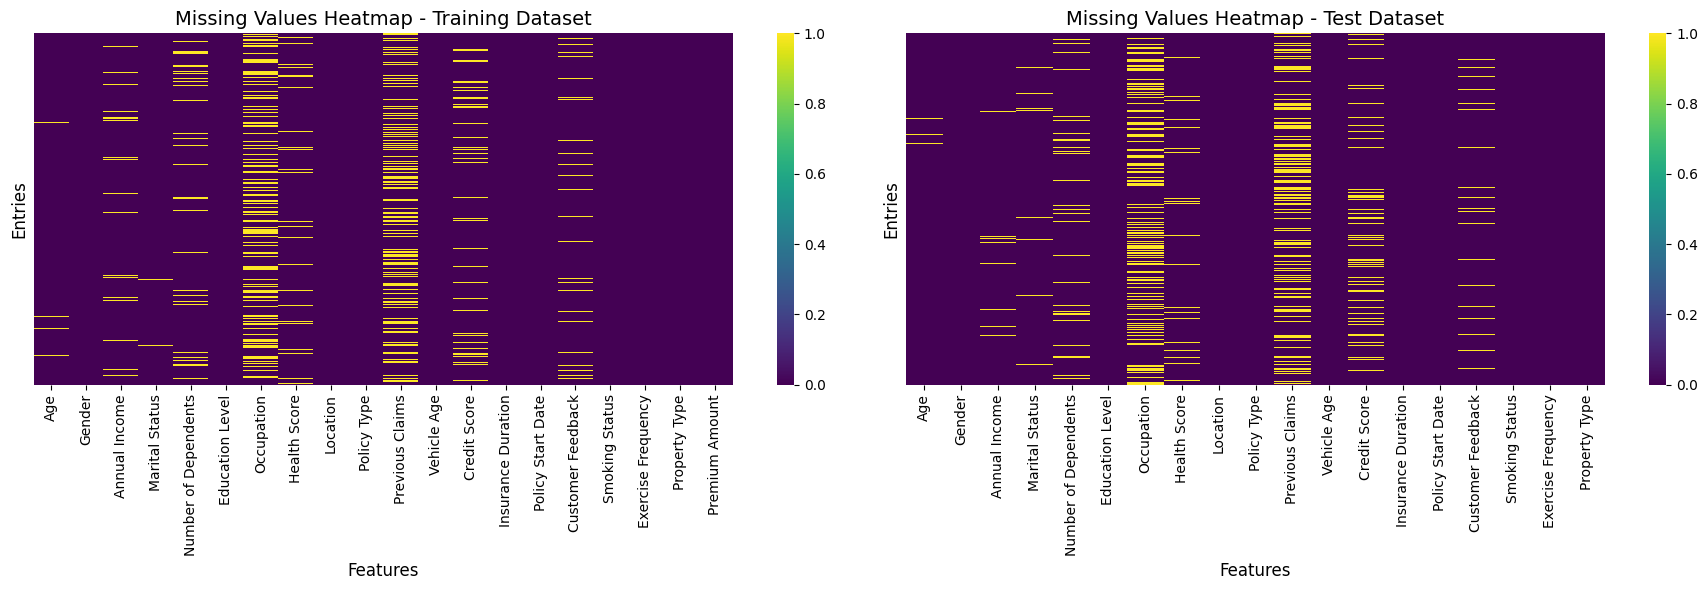

In [ ]:
missing_train = train_data.isnull()
missing_test = test_data.isnull()

#Plot
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

sns.heatmap(missing_train, cmap = 'viridis', cbar = True, yticklabels = False, ax = axes[0]) # ==========================> New command
axes[0].set_title('Missing Values Heatmap - Training Dataset', fontsize=14)
axes[0].set_xlabel('Features', fontsize=12)
axes[0].set_ylabel('Entries', fontsize=12)

sns.heatmap(missing_test, cmap='viridis', cbar=True, yticklabels=False, ax=axes[1])
axes[1].set_title('Missing Values Heatmap - Test Dataset', fontsize=14)
axes[1].set_xlabel('Features', fontsize=12)
axes[1].set_ylabel('Entries', fontsize=12)

plt.tight_layout()
plt.show()

### Key insights

**Training dataset:**
+ Several features in the training dataset have missing values, as indicated by the yellow streaks in the heatmap.
+ Features such as `Number of Dependents, Occupation, Previous Claims, and Credit Score` have a relatively high number of missing values.
+ Some columns, such as `Policy Start Date and Gender`, seem to have no missing values as indicated by their continuous dark bands.

**Test Dataset:**
+ The test dataset also has missing values, with patterns similar to the training dataset.
+ Features like `Previous Claims, Occupation, and Number of Dependents` show significant missing values, aligning with the training dataset's pattern.
+ No additional features have missing values compared to the training dataset, which ensures consistency between the datasets.

**Dataset Comparison:**
+ The distribution of missing values appears consistent across both the training and test datasets, implying similar data collection or preprocessing methods were used.
+ The percentage of missing values for features like `Credit Score and Previous Claims` might influence their impact on predictive models.

In [ ]:
def missing_values_table(df): # ===================================================================> New way to analyze missing value
  missing_count = df.isnull().sum()
  missing_percent = 100 * df.isnull().sum() / len(df)
  data_types = df.dtypes
  return pd.DataFrame({
      'Missing Values': missing_count,
      'Percentage (%)': missing_percent,
      'Data Type': data_types
  })

train_missing_table = missing_values_table(train_data)
test_missing_table = missing_values_table(test_data)

print("Missing Values Table - Training Dataset:\n")
display(train_missing_table[train_missing_table['Missing Values'] > 0])  # Display only features with missing values
print("\n")

print("Missing Values Table - Test Dataset:\n")
display(test_missing_table[test_missing_table['Missing Values'] > 0])

Missing Values Table - Training Dataset:



,Missing Values,Percentage (%),Data Type
Age,18705,1.558750,float64
Annual Income,44949,3.745750,float64
Marital Status,18529,1.544083,object
Number of Dependents,109672,9.139333,float64
Occupation,358075,29.839583,object
Health Score,74076,6.173000,float64
Previous Claims,364029,30.335750,float64
Vehicle Age,6,0.000500,float64
Credit Score,137882,11.490167,float64
Insurance Duration,1,0.000083,float64




Missing Values Table - Test Dataset:



,Missing Values,Percentage (%),Data Type
Age,12489,1.561125,float64
Annual Income,29860,3.732500,float64
Marital Status,12336,1.542000,object
Number of Dependents,73130,9.141250,float64
Occupation,239125,29.890625,object
Health Score,49449,6.181125,float64
Previous Claims,242802,30.350250,float64
Vehicle Age,3,0.000375,float64
Credit Score,91451,11.431375,float64
Insurance Duration,2,0.000250,float64


### Key insights from missing tables

**Training dataset**:
- High missing values: `Occupation (29.84%) and Previous Claims (30.34%), Credit Score (11.49%) and Number of Dependents (9.14%)`
- Moderate: `Health Score (6.17%) and Customer Feedback (6.49%)`
- Minimal: `Vehicle Age (0.0005%) and Insurance Duration (0.00008%)`
- Datatype of missing value: `object` and `float64`

**Test dataset**: almost identical

<ipython-input-11-a20854bf54b4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  train_colors = cm.get_cmap('viridis', len(train_missing))(range(len(train_missing)))
<ipython-input-11-a20854bf54b4>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  test_colors = cm.get_cmap('viridis', len(test_missing))(range(len(test_missing)))


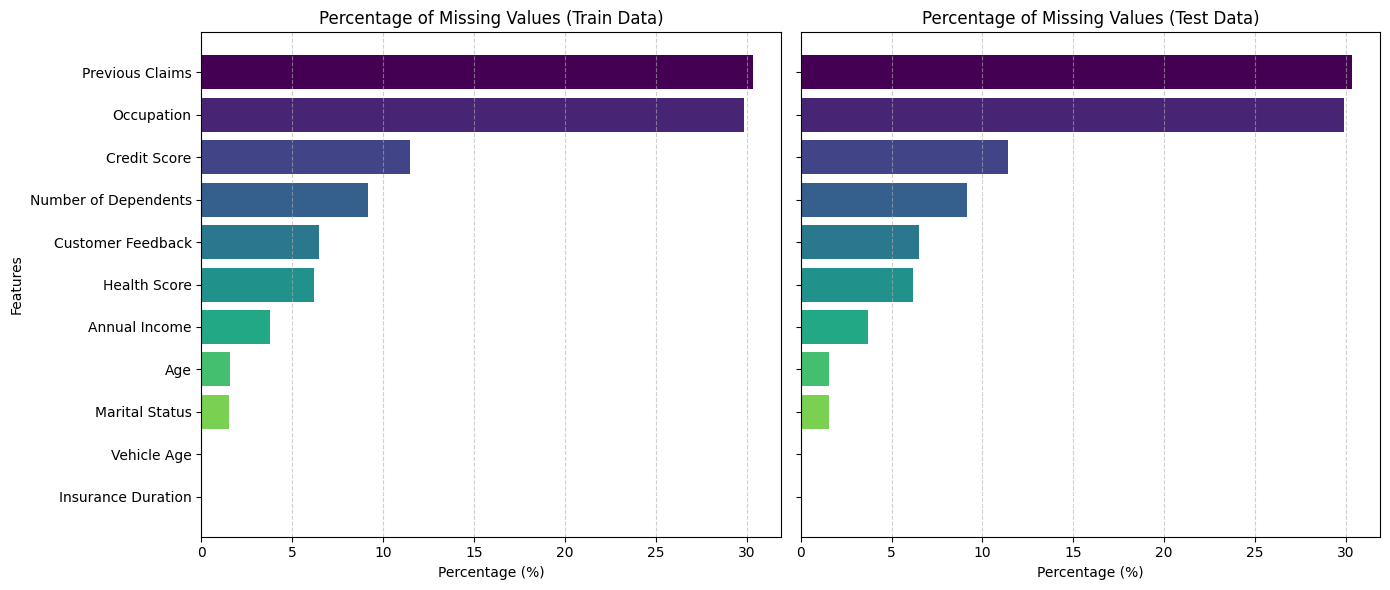

In [ ]:
train_missing = train_missing_table[train_missing_table['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
test_missing = test_missing_table[test_missing_table['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Bar plot for train dataset
train_colors = cm.get_cmap('viridis', len(train_missing))(range(len(train_missing)))
axes[0].barh(train_missing.index, train_missing['Percentage (%)'], color=train_colors)
axes[0].set_title('Percentage of Missing Values (Train Data)', fontsize=12)
axes[0].set_xlabel('Percentage (%)', fontsize=10)
axes[0].set_ylabel('Features', fontsize=10)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)
axes[0].invert_yaxis()

# Bar plot for test dataset
test_colors = cm.get_cmap('viridis', len(test_missing))(range(len(test_missing)))
axes[1].barh(test_missing.index, test_missing['Percentage (%)'], color=test_colors)
axes[1].set_title('Percentage of Missing Values (Test Data)', fontsize=12)
axes[1].set_xlabel('Percentage (%)', fontsize=10)
axes[1].grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
features_with_missing = train_missing_table[train_missing_table['Missing Values'] > 0].index.tolist()

def analyze_nan_with_target_filtered(df, target_column, features):
    missing_analysis = {}

    for col in features:
        # Split the data into missing and non-missing subsets for the column
        missing_mask = df[col].isnull()
        non_missing_mask = ~missing_mask

        # Calculate statistics for Premium Amount
        stats = {
            "Missing Count": missing_mask.sum(),
            "Non-Missing Count": non_missing_mask.sum(),
            "Mean (Missing)": df.loc[missing_mask, target_column].mean(),
            "Mean (Non-Missing)": df.loc[non_missing_mask, target_column].mean(),
            "Median (Missing)": df.loc[missing_mask, target_column].median(),
            "Median (Non-Missing)": df.loc[non_missing_mask, target_column].median(),
            "Std Dev (Missing)": df.loc[missing_mask, target_column].std(),
            "Std Dev (Non-Missing)": df.loc[non_missing_mask, target_column].std(),
        }

        missing_analysis[col] = stats

    return pd.DataFrame(missing_analysis).T

# Perform the analysis for only features with missing values
missing_vs_premium_filtered = analyze_nan_with_target_filtered(train_data, "Premium Amount", features_with_missing)

# Display the results
print("Analysis of Missing Values with Target (Premium Amount):\n")
display(missing_vs_premium_filtered)

Analysis of Missing Values with Target (Premium Amount):



,Missing Count,Non-Missing Count,Mean (Missing),Mean (Non-Missing),Median (Missing),Median (Non-Missing),Std Dev (Missing),Std Dev (Non-Missing)
Age,18705.0,1181295.0,1096.003689,1102.648396,873.0,872.0,862.234397,865.042527
Annual Income,44949.0,1155051.0,930.200605,1109.251625,556.0,882.0,959.098967,860.432015
Marital Status,18529.0,1181471.0,1217.871067,1100.736161,1001.0,871.0,904.286237,864.246334
Number of Dependents,109672.0,1090328.0,1126.441571,1100.141137,892.0,871.0,885.171044,862.907498
Occupation,358075.0,841925.0,1093.320969,1106.467773,861.0,876.0,859.637058,867.239987
Health Score,74076.0,1125924.0,1158.043172,1098.893513,930.0,867.0,782.759101,870.013254
Previous Claims,364029.0,835971.0,1076.944592,1113.692608,845.0,882.0,852.091240,870.324942
Vehicle Age,6.0,1199994.0,1197.833333,1102.544345,935.5,872.0,855.199022,864.999234
Credit Score,137882.0,1062118.0,1085.615773,1104.742516,845.0,874.0,874.343015,863.754490
Insurance Duration,1.0,1199999.0,1044.000000,1102.544870,1044.0,872.0,NaN,864.999218


### Potential strategy to handle missing value

- Imputation: Use median or mean values for numerical features like `Credit Score and Number of Dependents`. For categorical features like `Occupation`, use the mode or "Unknown".

In [ ]:
numeric_columns = train_data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in test_data.columns:
        median_value = train_data[col].median()  # Calculate the median
        train_data[col].fillna(median_value, inplace=True)
        test_data[col].fillna(median_value, inplace=True)

<ipython-input-13-d36175c1daf7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(median_value, inplace=True)
<ipython-input-13-d36175c1daf7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
object_columns = train_data.select_dtypes(include=['object']).columns
for col in object_columns:
    if col in test_data.columns:
        train_data[col].fillna("Unknown", inplace=True)
        test_data[col].fillna("Unknown", inplace=True)

<ipython-input-14-9ae8ad20272d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna("Unknown", inplace=True)
<ipython-input-14-9ae8ad20272d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Verify Missing Values

print("Missing Values After Imputation - Training Dataset:")
print(train_data.isnull().sum())

print("\nMissing Values After Imputation - Test Dataset:")
print(test_data.isnull().sum())

Missing Values After Imputation - Training Dataset:
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

Missing Values After Imputation - Test Dataset:
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Po

In [ ]:
# Check for duplicate rows in the training dataset
train_duplicates = train_data.duplicated().sum() # ==============================================> New way to get number of duplicated rows
print(f"\nNumber of duplicate rows in the training dataset: {train_duplicates}")

# Check for duplicate rows in the test dataset
test_duplicates = test_data.duplicated().sum()
print(f"Number of duplicate rows in the test dataset: {test_duplicates}")


Number of duplicate rows in the training dataset: 0
Number of duplicate rows in the test dataset: 0


## Exploratory Data Analysis (EDA)

In [ ]:
target_column = (set(train_data.columns) - set(test_data.columns)).pop() # =====================> New way to get target_column

print(f"Target column: {target_column}")
print(f"Data type: {train_data[target_column].dtype}")

Target column: Premium Amount
Data type: float64


### Target distribution analysis

<ipython-input-18-19d53d68bbd1>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_cmap = cm.get_cmap("viridis")


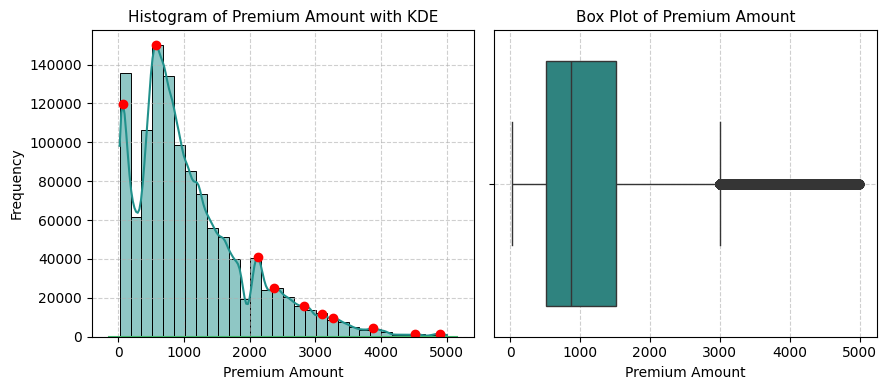

In [ ]:
# Custom colormap using viridis
viridis_cmap = cm.get_cmap("viridis")

def visualize_premium_amount_with_peaks(data, feature='Premium Amount'):
    plt.figure(figsize=(9, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    ax = sns.histplot(data[feature], bins=30, kde=True, color=viridis_cmap(0.5))
    plt.title(f'Histogram of {feature} with KDE', fontsize=11)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Extract KDE values to find peaks
    kde = sns.kdeplot(data[feature], ax=ax, color=viridis_cmap(0.7)).lines[0].get_data()
    kde_x, kde_y = kde[0], kde[1]
    peaks, _ = find_peaks(kde_y)

    # Highlight peaks
    for peak_idx in peaks:
        plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature], color=viridis_cmap(0.5))
    plt.title(f'Box Plot of {feature}', fontsize=11)
    plt.xlabel(feature, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

visualize_premium_amount_with_peaks(train_data, feature='Premium Amount')

### Key insights


**Distribution Characteristics:**
- Premium Amount shows a right-skewed distribution

**Outliers and Variability:**
- Significant number of values fall winthin a lower range displayed in the boxplot, as shown by the interquartile range (IQR).
- There are many outliers -> need further analysis

### Numerical features distribution analysis

<ipython-input-19-2cfbb263ba69>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_cmap = cm.get_cmap("viridis")


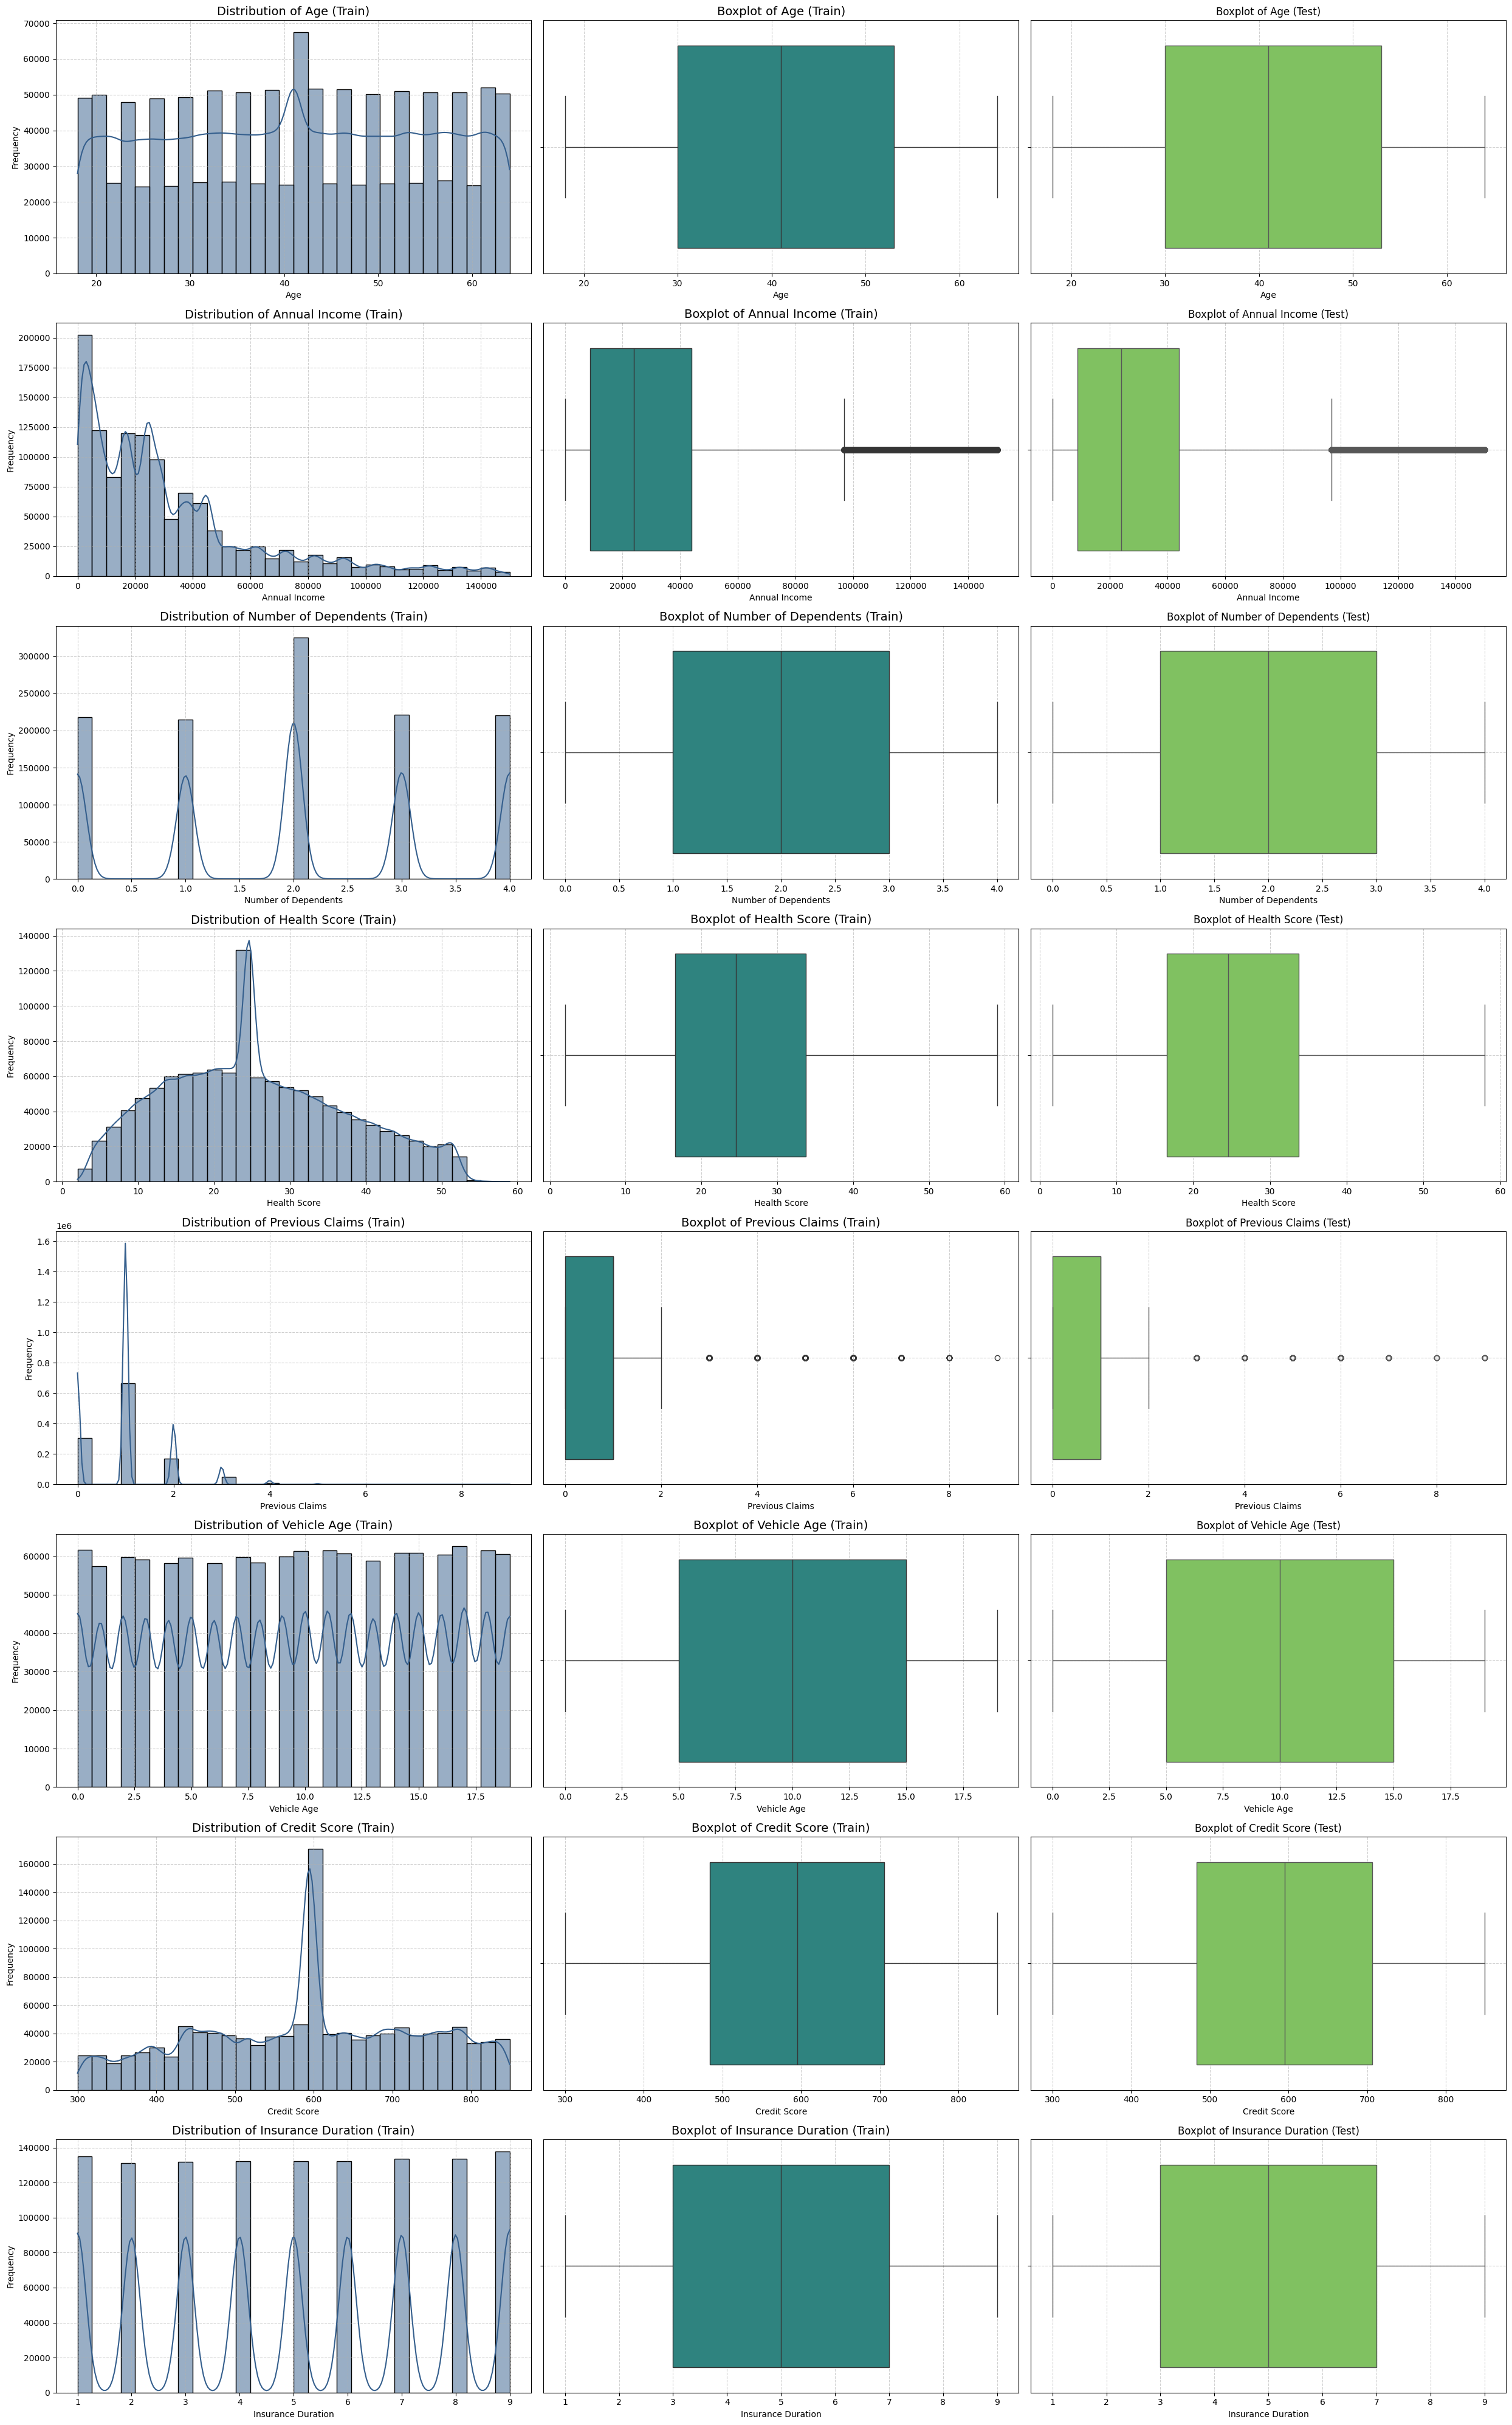

In [ ]:
columns_to_analyze = train_data.select_dtypes(include=['number']).columns.drop('Premium Amount')

viridis_cmap = cm.get_cmap("viridis")
# Extract three colors from the colormap
viridis_colors = [viridis_cmap(0.3), viridis_cmap(0.5), viridis_cmap(0.8)]

fig, axes = plt.subplots(len(columns_to_analyze), 3, figsize=(25, len(columns_to_analyze) * 5))

for i, column in enumerate(columns_to_analyze):
    # Histogram for train_data
    sns.histplot(train_data[column], bins=30, kde=True, color=viridis_colors[0], ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Train)', fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=10)
    axes[i, 0].set_ylabel('Frequency', fontsize=10)
    axes[i, 0].grid(visible=True, linestyle='--', alpha=0.6)

    # Boxplot for train_data
    sns.boxplot(x=train_data[column], color=viridis_colors[1], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} (Train)', fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=10)
    axes[i, 1].grid(visible=True, linestyle='--', alpha=0.6)

    # Boxplot for test_data
    sns.boxplot(x=test_data[column], color=viridis_colors[2], ax=axes[i, 2])
    axes[i, 2].set_title(f'Boxplot of {column} (Test)', fontsize=12)
    axes[i, 2].set_xlabel(column, fontsize=10)
    axes[i, 2].grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

===> There is a "median" peak if missing numerical features are imputed with median

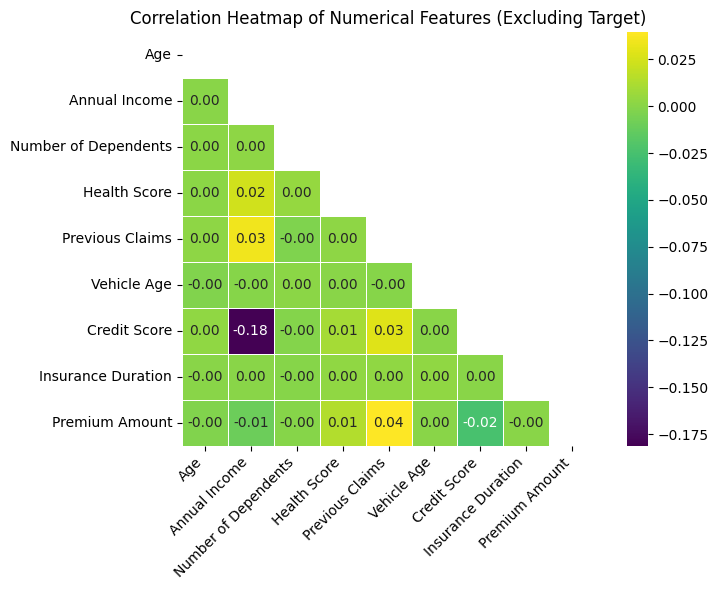

In [ ]:
numeric_data = train_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    cbar=True,
    square=True,
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numerical Features (Excluding Target)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Low correlation between features:**
- Exhibit very low correlation -> indicate that they are weakly related or independent.
- Minimal collinearity

**Target value correlation:**
- Most features show minimal correlation with the target variable (Premium Amount), highlighting the potential for non-linear relationships that might require advanced modeling techniques (e.g., tree-based algorithms).

### Categorical Feature Analysis

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


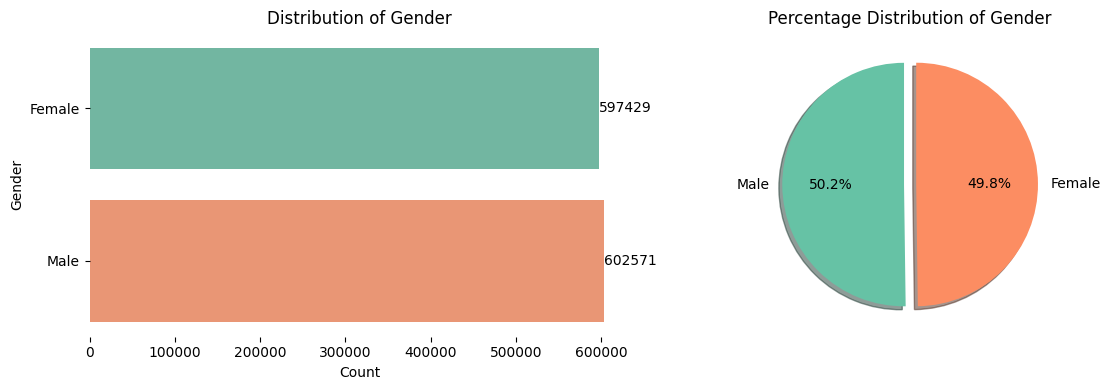

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


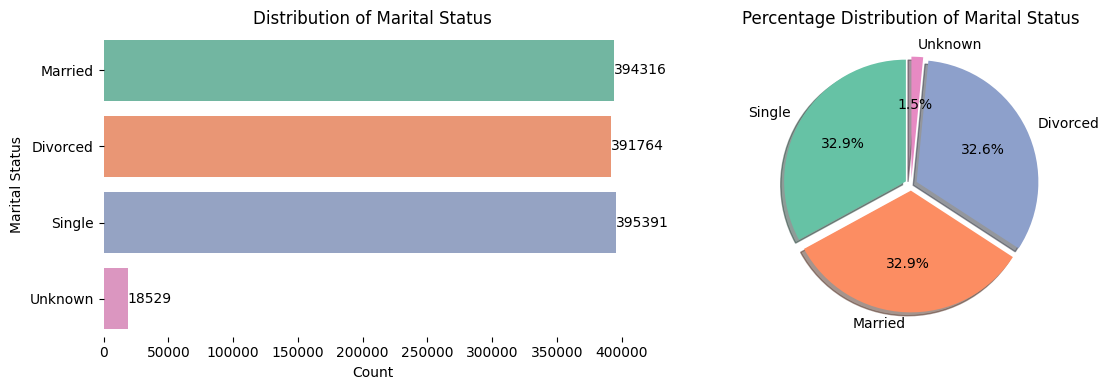

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


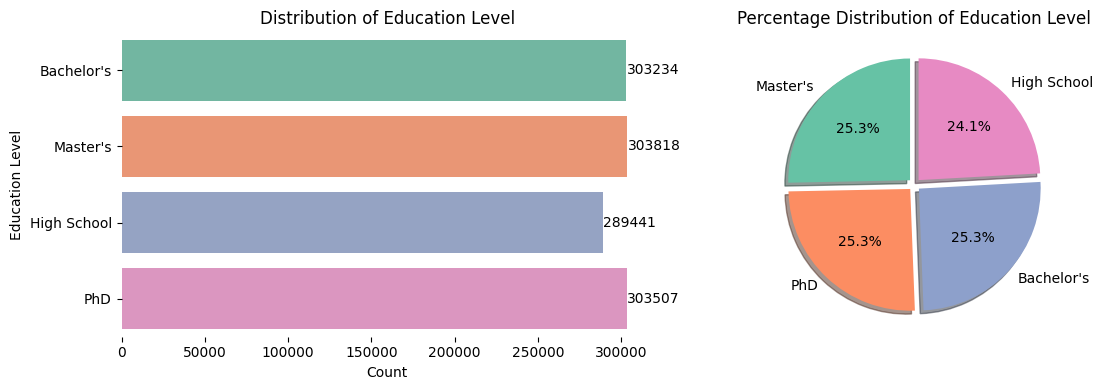

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


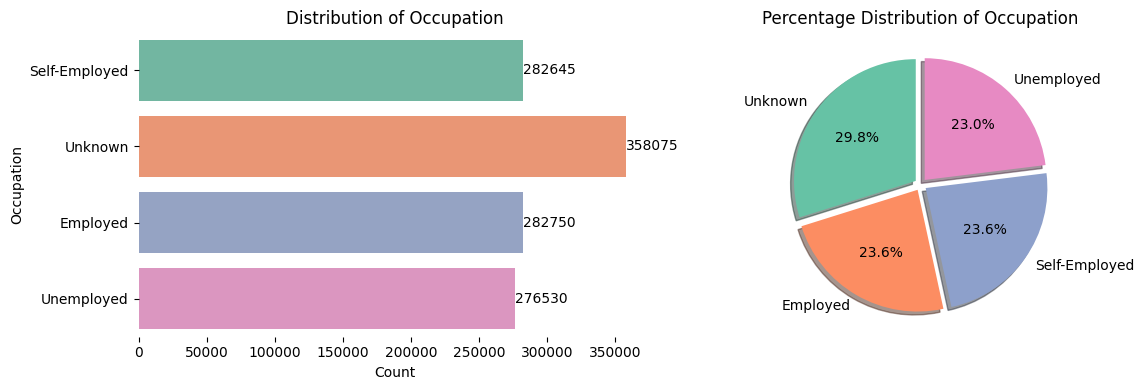

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


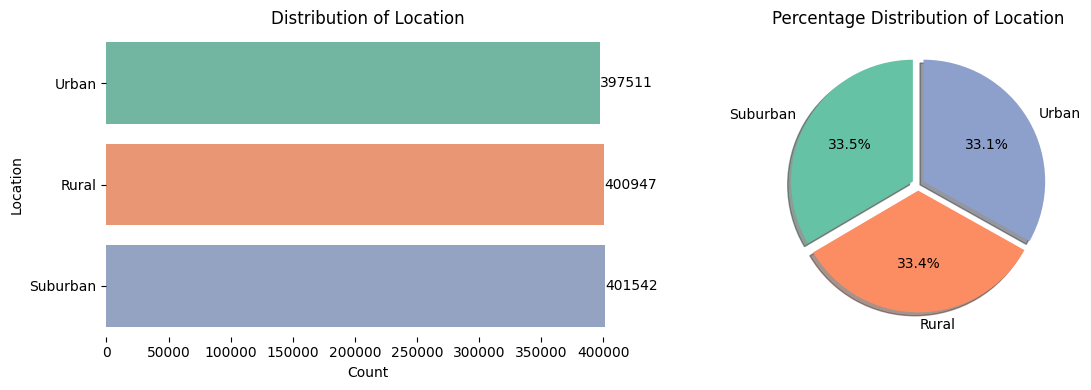

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


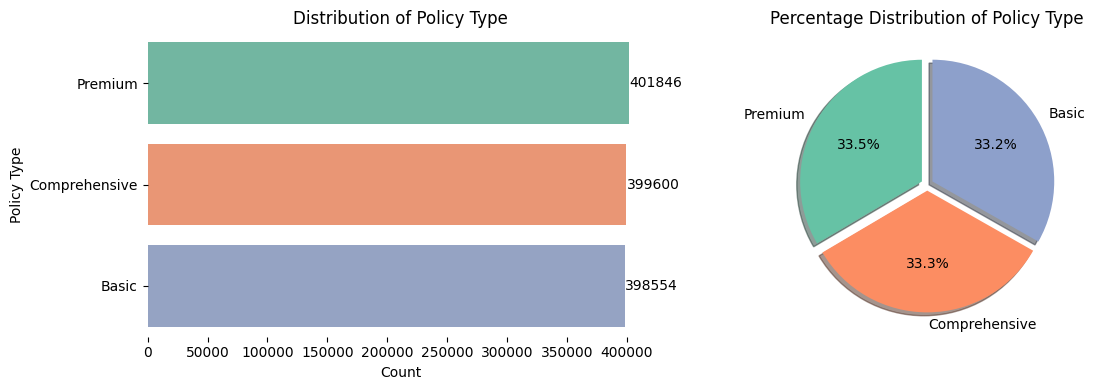

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


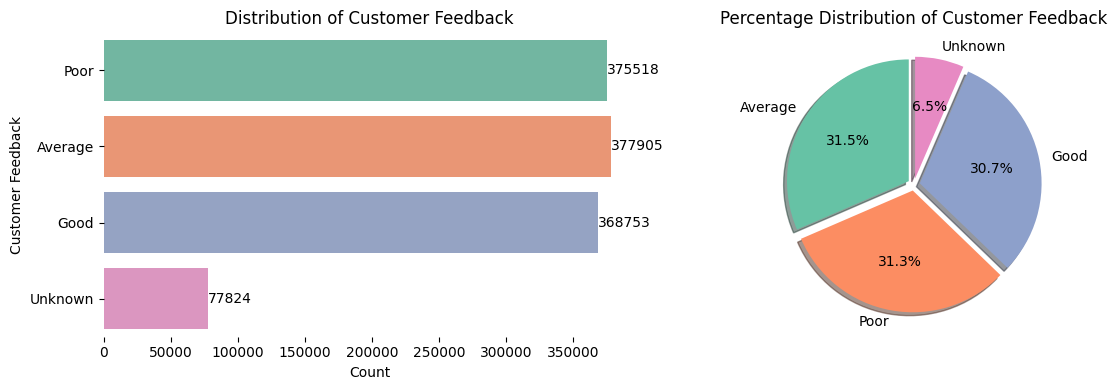

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


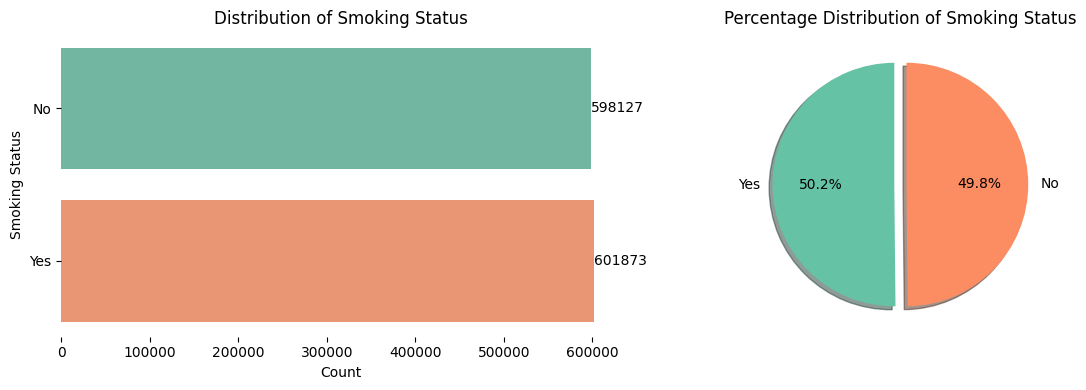

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


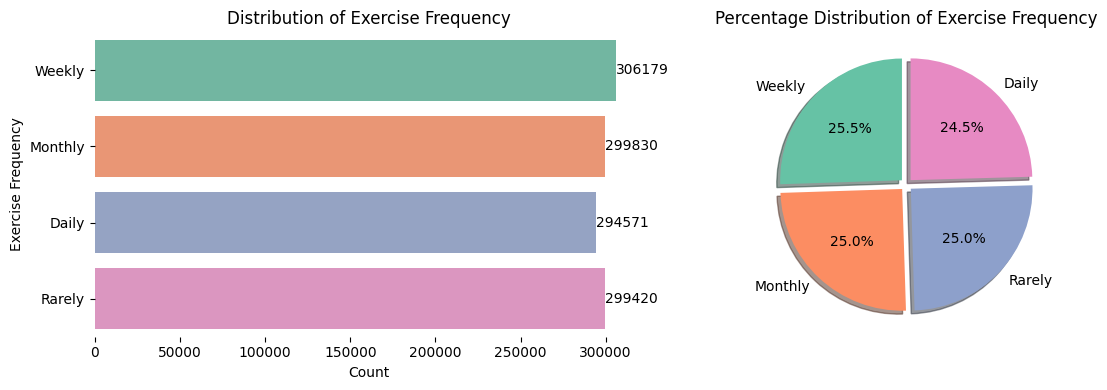

<ipython-input-21-d24c8a3ec090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set2')


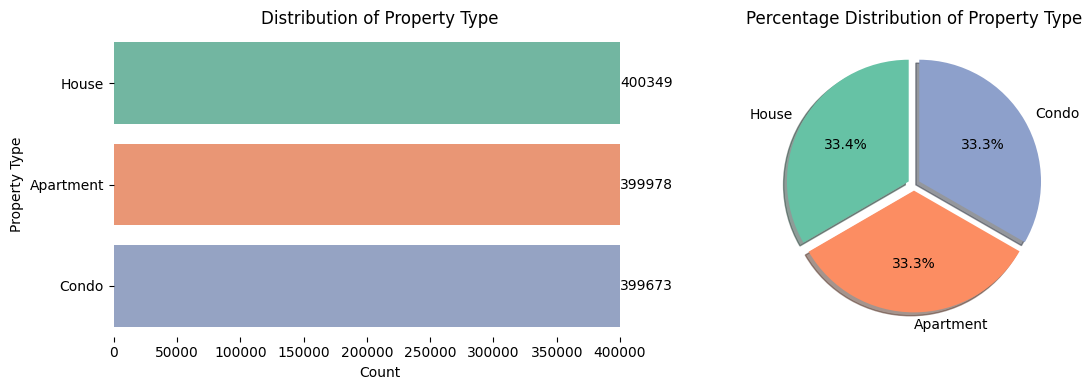

In [ ]:
def plot_categorical_distribution(data, column_name):
    plt.figure(figsize=(12, 4))

    # Bar plot for categorical distribution
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette='Set2')
    plt.title(f'Distribution of {column_name}', fontsize=12)
    plt.xlabel('Count', fontsize=10)
    plt.ylabel(column_name, fontsize=10)

    ax = plt.gca()
    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f'{count}',
                    (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    sns.despine(left=True, bottom=True)

    # Pie chart for percentage distribution
    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot.pie(
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2', data[column_name].nunique()),
        startangle=90,
        explode=[0.05] * data[column_name].nunique(),
        shadow=True
    )
    plt.title(f'Percentage Distribution of {column_name}', fontsize=12)
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
                'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

for column in categorical_columns:
    plot_categorical_distribution(train_data, column)

Gender Distribution:
- The dataset is balanced with a nearly equal proportion of males (50.21%) and females (49.79%).

Marital Status:
- The three primary categories (Single, Married, Divorced) are distributed almost equally, each accounting for about 33%.
- A small percentage (1.54%) of data is categorized as Unknown, which could be imputed or treated based on the analysis.

Education Level:
- Education levels are uniformly distributed among Bachelor's, Master's, PhD, and High School, with percentages ranging from 24% to 25%.
- No major outlier category exists in education, making this feature consistent.

Occupation:
- A significant portion (29.84%) of data falls under the Unknown category, indicating missing values that were replaced during preprocessing.
- The remaining categories (Employed, Self-Employed, Unemployed) are evenly distributed around 23%.

Location:
- The dataset shows an almost equal split between Suburban, Rural, and Urban areas, each contributing about 33% of the data.
Policy Type:
- The types of policies (Premium, Comprehensive, Basic) are evenly distributed, with each type accounting for approximately one-third of the data.

Customer Feedback:
- Feedback categories (Average, Poor, Good) account for around 31% each, with an Unknown category representing 6.48%.
- The presence of Unknown suggests gaps in feedback collection that might need attention.

Smoking Status:
- A balanced distribution exists between Yes (50.16%) and No (49.84%) categories, making it a useful feature for potential analysis.

Exercise Frequency:
- The dataset is evenly split across all four categories (Weekly, Monthly, Rarely, Daily), each contributing about 25%.

Property Type:
- The three property types (House, Apartment, Condo) are evenly distributed, each accounting for approximately 33%.

**Key Observations:**
- Many categorical features have balanced distributions, which can be advantageous for model training as it reduces bias.
- Certain features, such as Occupation, Customer Feedback, and Marital Status, contain Unknown categories due to imputed missing values. Their treatment depends on the modeling approach.
- Most features exhibit uniform distribution across their categories, suggesting no dominance of a single class, which could enhance feature diversity in the model.

## Data Preprocessing

### Process Categorical Columns

In [ ]:
column_name = 'Policy Start Date'
train_data[column_name] = pd.to_datetime(train_data[column_name], errors='raise')
test_data[column_name] = pd.to_datetime(test_data[column_name], errors='raise')

# Convert datetime to epoch time (in seconds)
train_data[column_name] = train_data[column_name].astype(np.int64) / 10**9
test_data[column_name] = test_data[column_name].astype(np.int64) / 10**9

In [ ]:
# Display the first few rows
print(f"Sample data for '{column_name}':\n", train_data[column_name].head())

# Display the data type of the column
print(f"Data type of '{column_name}' in train_data: {train_data[column_name].dtype}")

# Repeat for test_data
print(f"Sample data for '{column_name}' in test_data:\n", test_data[column_name].head())
print(f"Data type of '{column_name}' in test_data: {test_data[column_name].dtype}")

Sample data for 'Policy Start Date':
 id
0    1.703345e+09
1    1.686583e+09
2    1.696087e+09
3    1.718206e+09
4    1.638372e+09
Name: Policy Start Date, dtype: float64
Data type of 'Policy Start Date' in train_data: float64
Sample data for 'Policy Start Date' in test_data:
 id
1200000    1.685892e+09
1200001    1.713799e+09
1200002    1.680708e+09
1200003    1.698247e+09
1200004    1.637940e+09
Name: Policy Start Date, dtype: float64
Data type of 'Policy Start Date' in test_data: float64


In [ ]:
def identify_non_numerical_features(data, dataset_name):
    non_numerical_features = data.select_dtypes(include=['object'])
    print(f"Non-Numerical Features and Unique Values in {dataset_name} dataset:")
    for column in non_numerical_features.columns:
        unique_values = non_numerical_features[column].unique()
        print(f"\n{column}: {unique_values}")

# Apply the function to training and test datasets
identify_non_numerical_features(train_data, "Training")
print("\n")
identify_non_numerical_features(test_data, "Test")

Non-Numerical Features and Unique Values in Training dataset:

Gender: ['Female' 'Male']

Marital Status: ['Married' 'Divorced' 'Single' 'Unknown']

Education Level: ["Bachelor's" "Master's" 'High School' 'PhD']

Occupation: ['Self-Employed' 'Unknown' 'Employed' 'Unemployed']

Location: ['Urban' 'Rural' 'Suburban']

Policy Type: ['Premium' 'Comprehensive' 'Basic']

Customer Feedback: ['Poor' 'Average' 'Good' 'Unknown']

Smoking Status: ['No' 'Yes']

Exercise Frequency: ['Weekly' 'Monthly' 'Daily' 'Rarely']

Property Type: ['House' 'Apartment' 'Condo']


Non-Numerical Features and Unique Values in Test dataset:

Gender: ['Female' 'Male']

Marital Status: ['Unknown' 'Married' 'Divorced' 'Single']

Education Level: ["Bachelor's" "Master's" 'PhD' 'High School']

Occupation: ['Self-Employed' 'Unemployed' 'Unknown' 'Employed']

Location: ['Rural' 'Suburban' 'Urban']

Policy Type: ['Basic' 'Premium' 'Comprehensive']

Customer Feedback: ['Poor' 'Good' 'Average' 'Unknown']

Smoking Status: ['Ye

In [ ]:
# Define the encoding strategies for specific features
binary_features = ['Gender', 'Smoking Status']
ordinal_features = {
    'Exercise Frequency': ['Rarely', 'Monthly', 'Weekly', 'Daily']
}
nominal_features = ['Marital Status', 'Education Level', 'Occupation',
                    'Location', 'Policy Type', 'Customer Feedback', 'Property Type']

# Binary Encoding for binary features
le = LabelEncoder()
for feature in binary_features:
    train_data[feature] = le.fit_transform(train_data[feature])
    test_data[feature] = le.transform(test_data[feature])

# Ordinal Encoding for ordered features
for feature, order in ordinal_features.items():
    oe = OrdinalEncoder(categories=[order]) #===================================================================> Each feature has its own ordinal encoder due to different amount of values and names of value
    train_data[feature] = oe.fit_transform(train_data[[feature]]).flatten()  # Flatten to 1D
    test_data[feature] = oe.transform(test_data[[feature]]).flatten()       # Flatten to 1D

# One-Hot Encoding for nominal features
train_data = pd.get_dummies(train_data, columns=nominal_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=nominal_features, drop_first=True)

In [ ]:
# Create data type tables for train_data and test_data
train_data_types = pd.DataFrame({
    'Column Name': train_data.columns,
    'Train Data Type': train_data.dtypes
})

test_data_types = pd.DataFrame({
    'Column Name': test_data.columns,
    'Test Data Type': test_data.dtypes
})

# Merge the two tables for comparison
data_types_comparison = pd.merge(
    train_data_types,
    test_data_types,
    on='Column Name',
    how='outer'
)

# Display the data types comparison table
print("Data Types Comparison of Train and Test Datasets:\n")
display(data_types_comparison)

Data Types Comparison of Train and Test Datasets:



,Column Name,Train Data Type,Test Data Type
0,Age,float64,float64
1,Annual Income,float64,float64
2,Credit Score,float64,float64
3,Customer Feedback_Good,bool,bool
4,Customer Feedback_Poor,bool,bool
5,Customer Feedback_Unknown,bool,bool
6,Education Level_High School,bool,bool
7,Education Level_Master's,bool,bool
8,Education Level_PhD,bool,bool
9,Exercise Frequency,float64,float64


### Normalize Numerical Columns

In [ ]:
# Select numerical columns
numerical_columns = train_data.select_dtypes(include=['float64']).columns
numerical_columns = numerical_columns[numerical_columns != target_column]

# Applying Normalization
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

<ipython-input-28-82ef68022db5>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_cmap = cm.get_cmap('viridis', len(numeric_columns))


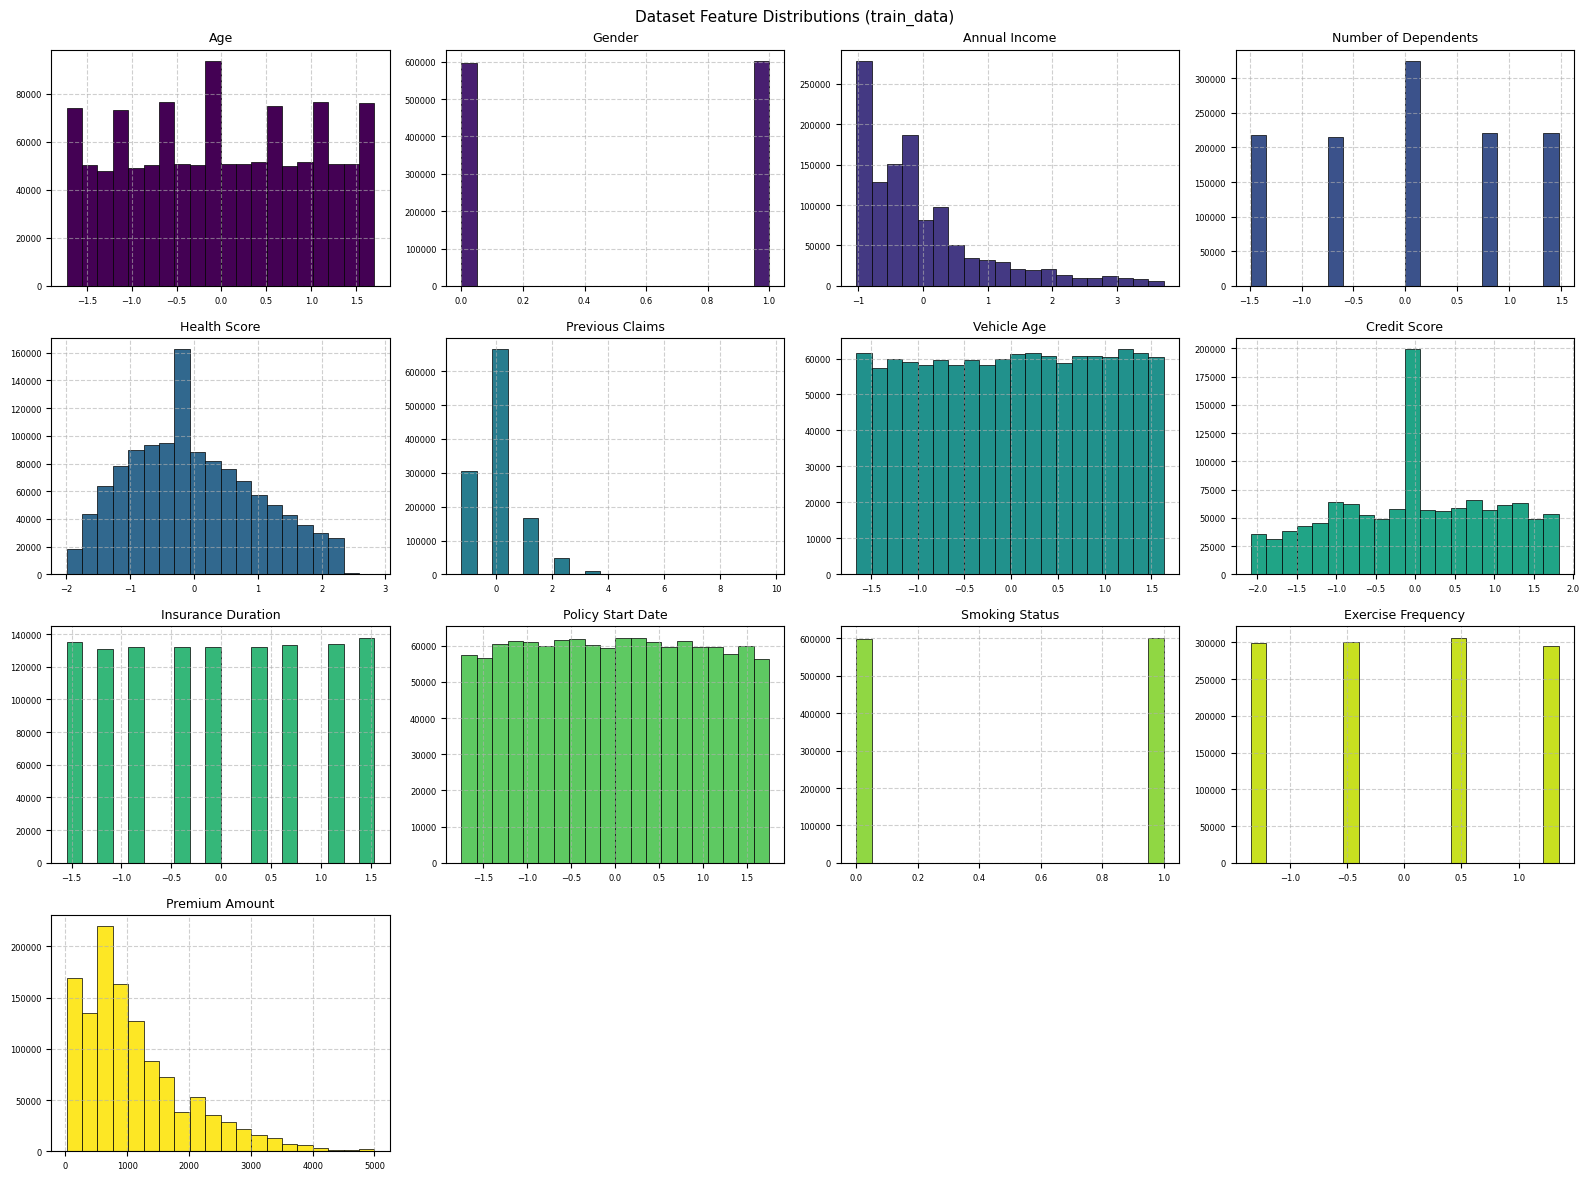

In [ ]:
# Identify numeric columns only (excluding boolean columns)
numeric_columns = train_data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed
num_features = len(numeric_columns)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows * 3))
viridis_cmap = cm.get_cmap('viridis', len(numeric_columns))

# Plot each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes.flatten()[i]
    train_data[column].hist(
        ax=ax,
        bins=20,
        color=viridis_cmap(i / len(numeric_columns)),
        edgecolor='black',
        linewidth=0.5
    )
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)

# Remove empty subplots if any
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.suptitle('Dataset Feature Distributions (train_data)', fontsize=11)
plt.tight_layout()
plt.show()

### Skeweness Reduction

In [ ]:
# Define the continuous columns
continuous_columns_train = ['Annual Income', 'Premium Amount']
continuous_columns_test = ['Annual Income']

# Calculate skewness for the specified continuous columns
train_skewness = train_data[continuous_columns_train].apply(skew)
test_skewness = test_data[continuous_columns_test].apply(skew)

# Display results
print("Skewness for Training Dataset:\n")
display(train_skewness)

print("\nSkewness for Test Dataset:\n")
display(test_skewness)

Skewness for Training Dataset:



,0
Annual Income,1.522952
Premium Amount,1.240914



Skewness for Test Dataset:



,0
Annual Income,1.516915


In [ ]:
# Log-transform skewed features
train_data['Annual Income'] = np.log1p(train_data['Annual Income'])
test_data['Annual Income'] = np.log1p(test_data['Annual Income'])

# Select only numeric columns from the training data
numeric_data = train_data.select_dtypes(include=['number'])

# Add a new column for the log-transformed values of target variable
numeric_data['Log_Transformed_Premium'] = np.log1p(train_data[target_column])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Correlation Analysis of Preprocessed Data

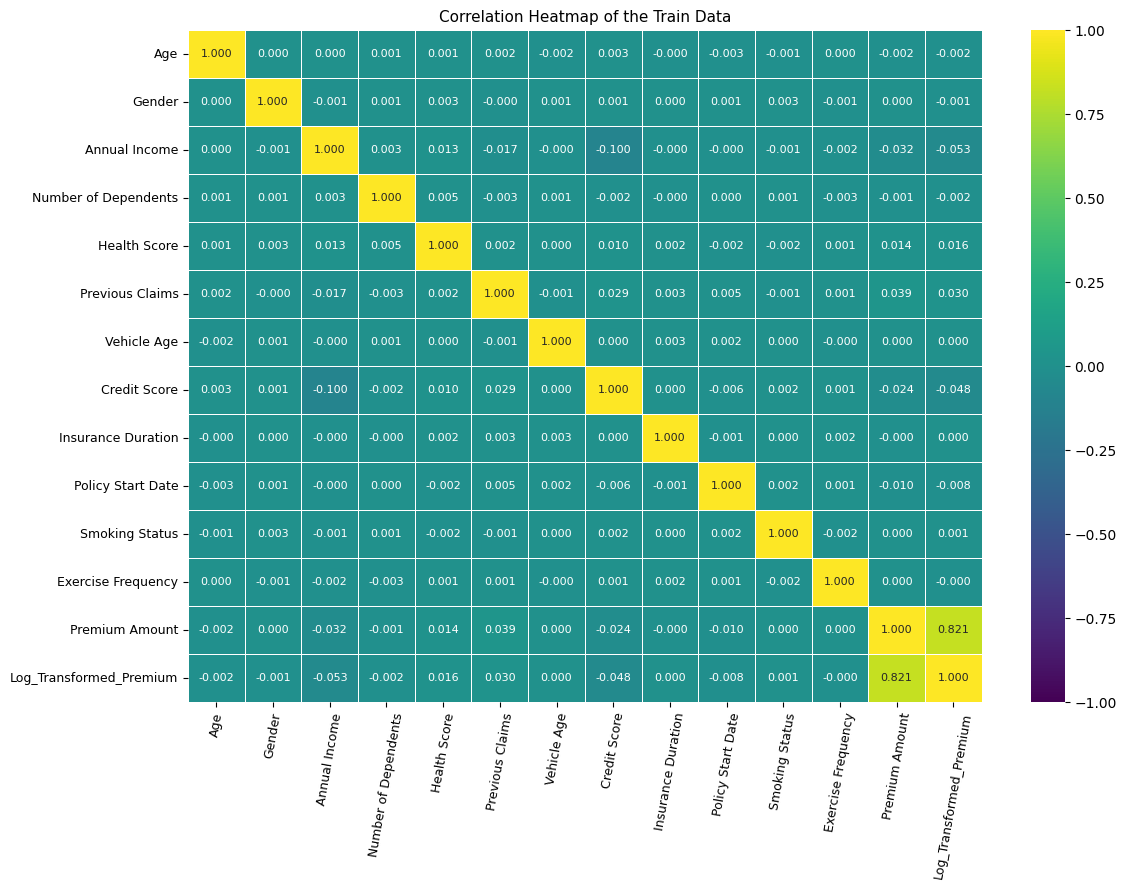

In [ ]:
# Compute the correlation matrix
train_corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    train_corr_matrix,
    annot=True,
    cmap='viridis',
    vmax=1,
    vmin=-1,
    annot_kws={"size": 8},
    fmt=".3f",
    linewidths=0.5
)

# Customize x and y tick labels
plt.xticks(rotation=80, fontsize=9)
plt.yticks(fontsize=9)

# Add title and layout adjustments
plt.title("Correlation Heatmap of the Train Data", fontsize=11)
plt.tight_layout()
plt.show()

- The log-transformation of the target variable (Log_Transformed_Premium) smooths the relationships between the target and input features, particularly for features influenced by outliers (e.g., Annual Income and Previous Claims).
- It reduces the magnitude of extreme correlations, creating a more stable predictive target while retaining the most critical relationships for predictive modeling.
- Features showing slight differences in correlation strength post-transformation indicate the utility of Log_Transformed_Premium for handling nonlinear relationships effectively.

In [ ]:
# Separate Features and Target
X_train = train_data.drop([target_column], axis=1)  # Features
y_train = train_data[target_column]                   # Target variable

# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)  # log1p is used for log(1 +

<ipython-input-33-46ac8ee874ff>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_cmap = cm.get_cmap("viridis")


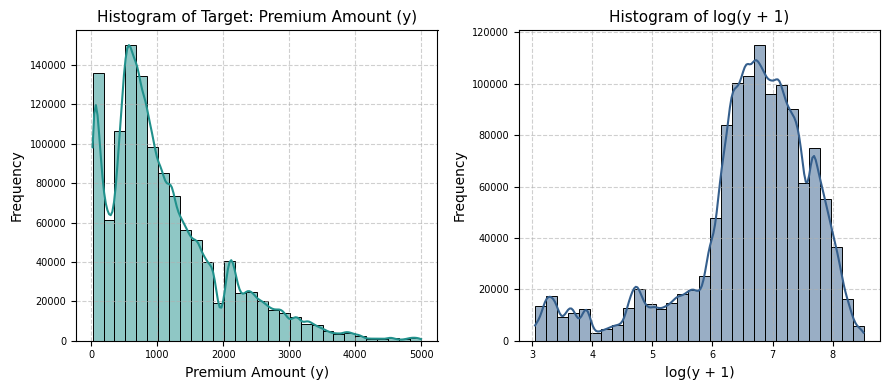

In [ ]:
# Custom colormap using viridis
viridis_cmap = cm.get_cmap("viridis")

# Select two colors from the colormap
color1 = viridis_cmap(0.5)
color2 = viridis_cmap(0.3)

# Plot with the custom colors
plt.figure(figsize=(9, 4))

# Plot original target distribution
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30, color=color1)
plt.title(f'Histogram of Target: {target_column} (y)', fontsize=11)
plt.xlabel(f'{target_column} (y)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

# Log-transformed target distribution
plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True, bins=30, color=color2)
plt.title('Histogram of log(y + 1)', fontsize=11)
plt.xlabel('log(y + 1)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- After applying the logarithmic transformation (log(y + 1)), the distribution becomes approximately normal, reducing the skewness observed in the original data.
- This normalization ensures that most values fall within a manageable range for machine learning models, improving their performance.

## Model Training

In [ ]:
def objective(trial):
  #Define param
  param = {
      "objective": "regression",
      "metric": "rmse",
      "boosting_type": "gbdt",
      "device": "cpu",
      "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
      "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
      "max_depth": trial.suggest_int("max_depth", 3, 15),
      "num_leaves": trial.suggest_int("num_leaves", 20, 300),
      "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
      "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
      "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
      "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10.0),
      "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10.0),
      "verbose": -1  # Suppress warnings and messages
  }

  X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train_log, test_size=0.2, random_state=86)

  model = lgb.LGBMRegressor(**param)
  model.fit(X_train_split, y_train_split, eval_set=[(X_val, y_val)], callbacks=[early_stopping(stopping_rounds=30, verbose=False), log_evaluation(10)])

  y_pred = model.predict(X_val)
  rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

  return rmsle

In [ ]:
# Create and optimize the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=25)

# Display the best parameters and score
print("Best parameters:", study.best_params)
print("Best RMSLE:", study.best_value)

[I 2024-12-28 14:57:39,570] A new study created in memory with name: no-name-ca03564a-2c33-4b34-804f-a80207652739
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-35-8e984f159351>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.

[10]	valid_0's rmse: 1.08982
[20]	valid_0's rmse: 1.08524
[30]	valid_0's rmse: 1.07974
[40]	valid_0's rmse: 1.0765
[50]	valid_0's rmse: 1.07318
[60]	valid_0's rmse: 1.07062
[70]	valid_0's rmse: 1.06801
[80]	valid_0's rmse: 1.06565
[90]	valid_0's rmse: 1.06371
[100]	valid_0's rmse: 1.06217
[110]	valid_0's rmse: 1.06086
[120]	valid_0's rmse: 1.05953
[130]	valid_0's rmse: 1.05825
[140]	valid_0's rmse: 1.05682
[150]	valid_0's rmse: 1.05575
[160]	valid_0's rmse: 1.0547
[170]	valid_0's rmse: 1.05396
[180]	valid_0's rmse: 1.05334
[190]	valid_0's rmse: 1.05263
[200]	valid_0's rmse: 1.05194
[210]	valid_0's rmse: 1.05135
[220]	valid_0's rmse: 1.05075
[230]	valid_0's rmse: 1.05013
[240]	valid_0's rmse: 1.04971
[250]	valid_0's rmse: 1.04928
[260]	valid_0's rmse: 1.04896
[270]	valid_0's rmse: 1.04866
[280]	valid_0's rmse: 1.0484
[290]	valid_0's rmse: 1.0482
[300]	valid_0's rmse: 1.04799
[310]	valid_0's rmse: 1.04777
[320]	valid_0's rmse: 1.04755
[330]	valid_0's rmse: 1.04741
[340]	valid_0's rmse: 1

[I 2024-12-28 14:59:43,269] Trial 0 finished with value: 0.15815608868567013 and parameters: {'learning_rate': 0.011104686917426726, 'n_estimators': 917, 'max_depth': 6, 'num_leaves': 237, 'min_child_samples': 20, 'subsample': 0.5236874384523669, 'colsample_bytree': 0.8035944269587656, 'reg_alpha': 2.2887099268951747, 'reg_lambda': 0.04823547464405828}. Best is trial 0 with value: 0.15815608868567013.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0)

[10]	valid_0's rmse: 1.0897
[20]	valid_0's rmse: 1.08301
[30]	valid_0's rmse: 1.07708
[40]	valid_0's rmse: 1.0733
[50]	valid_0's rmse: 1.06891
[60]	valid_0's rmse: 1.06538
[70]	valid_0's rmse: 1.06412
[80]	valid_0's rmse: 1.06115
[90]	valid_0's rmse: 1.05892
[100]	valid_0's rmse: 1.0572
[110]	valid_0's rmse: 1.05598
[120]	valid_0's rmse: 1.05456
[130]	valid_0's rmse: 1.0535


[I 2024-12-28 15:00:03,787] Trial 1 finished with value: 0.15927060837828622 and parameters: {'learning_rate': 0.019147738948682387, 'n_estimators': 139, 'max_depth': 7, 'num_leaves': 211, 'min_child_samples': 19, 'subsample': 0.8403330814934304, 'colsample_bytree': 0.6424882109993811, 'reg_alpha': 2.8569886435024117, 'reg_lambda': 0.055507047577375075}. Best is trial 0 with value: 0.15815608868567013.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0

[10]	valid_0's rmse: 1.05897
[20]	valid_0's rmse: 1.04853
[30]	valid_0's rmse: 1.04561
[40]	valid_0's rmse: 1.0446
[50]	valid_0's rmse: 1.04421
[60]	valid_0's rmse: 1.04402
[70]	valid_0's rmse: 1.04395
[80]	valid_0's rmse: 1.04394
[90]	valid_0's rmse: 1.04396
[100]	valid_0's rmse: 1.04395


[I 2024-12-28 15:00:20,080] Trial 2 finished with value: 0.15801915785579526 and parameters: {'learning_rate': 0.0611008052583139, 'n_estimators': 634, 'max_depth': 15, 'num_leaves': 144, 'min_child_samples': 75, 'subsample': 0.9860218105546394, 'colsample_bytree': 0.9957776119912873, 'reg_alpha': 0.09240048810466656, 'reg_lambda': 0.009678311506415533}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0

[10]	valid_0's rmse: 1.06112
[20]	valid_0's rmse: 1.0486
[30]	valid_0's rmse: 1.04502
[40]	valid_0's rmse: 1.04437
[50]	valid_0's rmse: 1.04422
[60]	valid_0's rmse: 1.04423
[70]	valid_0's rmse: 1.0442
[80]	valid_0's rmse: 1.04424
[90]	valid_0's rmse: 1.04427
[100]	valid_0's rmse: 1.04431


[I 2024-12-28 15:00:35,730] Trial 3 finished with value: 0.15803572726058907 and parameters: {'learning_rate': 0.08029925591588989, 'n_estimators': 550, 'max_depth': 13, 'num_leaves': 201, 'min_child_samples': 48, 'subsample': 0.7163973257115812, 'colsample_bytree': 0.8995132142933691, 'reg_alpha': 0.0020001734862753443, 'reg_lambda': 0.2076531624369212}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.

[10]	valid_0's rmse: 1.0692
[20]	valid_0's rmse: 1.05648
[30]	valid_0's rmse: 1.05036
[40]	valid_0's rmse: 1.04757
[50]	valid_0's rmse: 1.04601
[60]	valid_0's rmse: 1.04521
[70]	valid_0's rmse: 1.04478
[80]	valid_0's rmse: 1.04446
[90]	valid_0's rmse: 1.04424
[100]	valid_0's rmse: 1.04412
[110]	valid_0's rmse: 1.04403
[120]	valid_0's rmse: 1.04395
[130]	valid_0's rmse: 1.04393
[140]	valid_0's rmse: 1.0439
[150]	valid_0's rmse: 1.04389
[160]	valid_0's rmse: 1.04389
[170]	valid_0's rmse: 1.04386
[180]	valid_0's rmse: 1.04387
[190]	valid_0's rmse: 1.04387
[200]	valid_0's rmse: 1.04387


[I 2024-12-28 15:01:01,373] Trial 4 finished with value: 0.1580221528985395 and parameters: {'learning_rate': 0.039168441476086585, 'n_estimators': 603, 'max_depth': 12, 'num_leaves': 54, 'min_child_samples': 70, 'subsample': 0.6730239886265382, 'colsample_bytree': 0.9635576542102176, 'reg_alpha': 0.002278553912526281, 'reg_lambda': 0.001635935360205435}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.

[10]	valid_0's rmse: 1.08166
[20]	valid_0's rmse: 1.07201
[30]	valid_0's rmse: 1.06559
[40]	valid_0's rmse: 1.06157
[50]	valid_0's rmse: 1.05861
[60]	valid_0's rmse: 1.05629
[70]	valid_0's rmse: 1.05451
[80]	valid_0's rmse: 1.05306
[90]	valid_0's rmse: 1.05183
[100]	valid_0's rmse: 1.05091
[110]	valid_0's rmse: 1.05033
[120]	valid_0's rmse: 1.04979
[130]	valid_0's rmse: 1.04936
[140]	valid_0's rmse: 1.04898
[150]	valid_0's rmse: 1.04863
[160]	valid_0's rmse: 1.04837
[170]	valid_0's rmse: 1.04817
[180]	valid_0's rmse: 1.04794
[190]	valid_0's rmse: 1.04774
[200]	valid_0's rmse: 1.04759
[210]	valid_0's rmse: 1.04745
[220]	valid_0's rmse: 1.04734
[230]	valid_0's rmse: 1.04719
[240]	valid_0's rmse: 1.0471
[250]	valid_0's rmse: 1.04702
[260]	valid_0's rmse: 1.04694
[270]	valid_0's rmse: 1.04686
[280]	valid_0's rmse: 1.04682
[290]	valid_0's rmse: 1.04673
[300]	valid_0's rmse: 1.04666
[310]	valid_0's rmse: 1.04664
[320]	valid_0's rmse: 1.0466
[330]	valid_0's rmse: 1.04654
[340]	valid_0's rmse:

[I 2024-12-28 15:02:03,966] Trial 5 finished with value: 0.15821012758692 and parameters: {'learning_rate': 0.030396801361637076, 'n_estimators': 866, 'max_depth': 5, 'num_leaves': 38, 'min_child_samples': 28, 'subsample': 0.9861208129757704, 'colsample_bytree': 0.8908891566309303, 'reg_alpha': 2.906390244884963, 'reg_lambda': 0.33199401730164635}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ip

[10]	valid_0's rmse: 1.08842
[20]	valid_0's rmse: 1.0835
[30]	valid_0's rmse: 1.07917
[40]	valid_0's rmse: 1.07623
[50]	valid_0's rmse: 1.07365
[60]	valid_0's rmse: 1.07159
[70]	valid_0's rmse: 1.07001
[80]	valid_0's rmse: 1.06901
[90]	valid_0's rmse: 1.06806
[100]	valid_0's rmse: 1.06715
[110]	valid_0's rmse: 1.06619
[120]	valid_0's rmse: 1.06539
[130]	valid_0's rmse: 1.06459
[140]	valid_0's rmse: 1.06397
[150]	valid_0's rmse: 1.06324
[160]	valid_0's rmse: 1.06268
[170]	valid_0's rmse: 1.06214
[180]	valid_0's rmse: 1.0617
[190]	valid_0's rmse: 1.06115
[200]	valid_0's rmse: 1.06082
[210]	valid_0's rmse: 1.06039
[220]	valid_0's rmse: 1.06003
[230]	valid_0's rmse: 1.05971
[240]	valid_0's rmse: 1.05942
[250]	valid_0's rmse: 1.05908
[260]	valid_0's rmse: 1.05882
[270]	valid_0's rmse: 1.05857
[280]	valid_0's rmse: 1.05833
[290]	valid_0's rmse: 1.05807
[300]	valid_0's rmse: 1.0579
[310]	valid_0's rmse: 1.05746
[320]	valid_0's rmse: 1.05709
[330]	valid_0's rmse: 1.05672
[340]	valid_0's rmse: 

[I 2024-12-28 15:02:37,371] Trial 6 finished with value: 0.15950740471510935 and parameters: {'learning_rate': 0.024274052028731768, 'n_estimators': 428, 'max_depth': 3, 'num_leaves': 271, 'min_child_samples': 86, 'subsample': 0.8094672480252865, 'colsample_bytree': 0.8402497317958786, 'reg_alpha': 0.9890334911745428, 'reg_lambda': 0.0016509799983922457}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.

[10]	valid_0's rmse: 1.07934
[20]	valid_0's rmse: 1.06442
[30]	valid_0's rmse: 1.05741
[40]	valid_0's rmse: 1.05426
[50]	valid_0's rmse: 1.05194
[60]	valid_0's rmse: 1.05029
[70]	valid_0's rmse: 1.04964
[80]	valid_0's rmse: 1.04855
[90]	valid_0's rmse: 1.04806
[100]	valid_0's rmse: 1.04774
[110]	valid_0's rmse: 1.04761
[120]	valid_0's rmse: 1.04738
[130]	valid_0's rmse: 1.04734
[140]	valid_0's rmse: 1.04724
[150]	valid_0's rmse: 1.04708
[160]	valid_0's rmse: 1.04688
[170]	valid_0's rmse: 1.0468
[180]	valid_0's rmse: 1.04677
[190]	valid_0's rmse: 1.04674
[200]	valid_0's rmse: 1.04672
[210]	valid_0's rmse: 1.04663
[220]	valid_0's rmse: 1.0466
[230]	valid_0's rmse: 1.0466
[240]	valid_0's rmse: 1.04651
[250]	valid_0's rmse: 1.04647
[260]	valid_0's rmse: 1.04648
[270]	valid_0's rmse: 1.04646
[280]	valid_0's rmse: 1.04642
[290]	valid_0's rmse: 1.04642
[300]	valid_0's rmse: 1.04641
[310]	valid_0's rmse: 1.04637
[320]	valid_0's rmse: 1.04634
[330]	valid_0's rmse: 1.04634


[I 2024-12-28 15:03:11,951] Trial 7 finished with value: 0.15823644484815283 and parameters: {'learning_rate': 0.08354901471789732, 'n_estimators': 332, 'max_depth': 5, 'num_leaves': 261, 'min_child_samples': 28, 'subsample': 0.7444342693620015, 'colsample_bytree': 0.6508155335931409, 'reg_alpha': 4.001787841831465, 'reg_lambda': 0.04884941673954398}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),


[10]	valid_0's rmse: 1.07169
[20]	valid_0's rmse: 1.06024
[30]	valid_0's rmse: 1.05453
[40]	valid_0's rmse: 1.05156
[50]	valid_0's rmse: 1.04972
[60]	valid_0's rmse: 1.04869
[70]	valid_0's rmse: 1.04811
[80]	valid_0's rmse: 1.04761
[90]	valid_0's rmse: 1.04737
[100]	valid_0's rmse: 1.04715
[110]	valid_0's rmse: 1.0468
[120]	valid_0's rmse: 1.04678
[130]	valid_0's rmse: 1.0466
[140]	valid_0's rmse: 1.04653
[150]	valid_0's rmse: 1.04633
[160]	valid_0's rmse: 1.04631
[170]	valid_0's rmse: 1.0462
[180]	valid_0's rmse: 1.04611
[190]	valid_0's rmse: 1.04609
[200]	valid_0's rmse: 1.04608
[210]	valid_0's rmse: 1.04605
[220]	valid_0's rmse: 1.04601
[230]	valid_0's rmse: 1.04599
[240]	valid_0's rmse: 1.04596
[250]	valid_0's rmse: 1.04594
[260]	valid_0's rmse: 1.04593
[270]	valid_0's rmse: 1.04588
[280]	valid_0's rmse: 1.04587
[290]	valid_0's rmse: 1.04588
[300]	valid_0's rmse: 1.04587
[310]	valid_0's rmse: 1.04586
[320]	valid_0's rmse: 1.04583
[330]	valid_0's rmse: 1.04581
[340]	valid_0's rmse: 

[I 2024-12-28 15:03:51,622] Trial 8 finished with value: 0.15817591828354693 and parameters: {'learning_rate': 0.08463989193638573, 'n_estimators': 737, 'max_depth': 5, 'num_leaves': 150, 'min_child_samples': 75, 'subsample': 0.6394947512549023, 'colsample_bytree': 0.778439058415344, 'reg_alpha': 0.03903864398953309, 'reg_lambda': 0.003550246769981319}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0)

[10]	valid_0's rmse: 1.08867
[20]	valid_0's rmse: 1.08243
[30]	valid_0's rmse: 1.07726
[40]	valid_0's rmse: 1.07353
[50]	valid_0's rmse: 1.07013
[60]	valid_0's rmse: 1.06784
[70]	valid_0's rmse: 1.06624
[80]	valid_0's rmse: 1.06427
[90]	valid_0's rmse: 1.06265
[100]	valid_0's rmse: 1.06137
[110]	valid_0's rmse: 1.06048
[120]	valid_0's rmse: 1.0593
[130]	valid_0's rmse: 1.05839
[140]	valid_0's rmse: 1.05759
[150]	valid_0's rmse: 1.05689
[160]	valid_0's rmse: 1.0561
[170]	valid_0's rmse: 1.05554
[180]	valid_0's rmse: 1.05505
[190]	valid_0's rmse: 1.05461
[200]	valid_0's rmse: 1.05424
[210]	valid_0's rmse: 1.05385
[220]	valid_0's rmse: 1.05344
[230]	valid_0's rmse: 1.05314
[240]	valid_0's rmse: 1.05284
[250]	valid_0's rmse: 1.05248
[260]	valid_0's rmse: 1.05222
[270]	valid_0's rmse: 1.05202
[280]	valid_0's rmse: 1.05179
[290]	valid_0's rmse: 1.05157
[300]	valid_0's rmse: 1.05136
[310]	valid_0's rmse: 1.05119
[320]	valid_0's rmse: 1.05104
[330]	valid_0's rmse: 1.05093
[340]	valid_0's rmse:

[I 2024-12-28 15:04:47,073] Trial 9 finished with value: 0.15868458917793535 and parameters: {'learning_rate': 0.021751137379795293, 'n_estimators': 568, 'max_depth': 4, 'num_leaves': 51, 'min_child_samples': 40, 'subsample': 0.5778712225774427, 'colsample_bytree': 0.7227311858301291, 'reg_alpha': 0.01803854154722964, 'reg_lambda': 0.03087246771197209}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0)

[10]	valid_0's rmse: 1.07744
[20]	valid_0's rmse: 1.05581
[30]	valid_0's rmse: 1.05015
[40]	valid_0's rmse: 1.04748
[50]	valid_0's rmse: 1.04618
[60]	valid_0's rmse: 1.0458
[70]	valid_0's rmse: 1.04583
[80]	valid_0's rmse: 1.04571
[90]	valid_0's rmse: 1.0457
[100]	valid_0's rmse: 1.04569
[110]	valid_0's rmse: 1.04578
[120]	valid_0's rmse: 1.04581


[I 2024-12-28 15:05:03,368] Trial 10 finished with value: 0.15815133538073925 and parameters: {'learning_rate': 0.16665554784129938, 'n_estimators': 734, 'max_depth': 15, 'num_leaves': 127, 'min_child_samples': 100, 'subsample': 0.9675851793378006, 'colsample_bytree': 0.5082203171963758, 'reg_alpha': 0.2793595526451891, 'reg_lambda': 2.423277331605483}. Best is trial 2 with value: 0.15801915785579526.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0)

[10]	valid_0's rmse: 1.06316
[20]	valid_0's rmse: 1.05149
[30]	valid_0's rmse: 1.04708
[40]	valid_0's rmse: 1.04535
[50]	valid_0's rmse: 1.04465
[60]	valid_0's rmse: 1.04429
[70]	valid_0's rmse: 1.04408
[80]	valid_0's rmse: 1.04397
[90]	valid_0's rmse: 1.04387
[100]	valid_0's rmse: 1.0438
[110]	valid_0's rmse: 1.0438
[120]	valid_0's rmse: 1.04378
[130]	valid_0's rmse: 1.04377
[140]	valid_0's rmse: 1.04379
[150]	valid_0's rmse: 1.04376
[160]	valid_0's rmse: 1.04376
[170]	valid_0's rmse: 1.04377
[180]	valid_0's rmse: 1.04379


[I 2024-12-28 15:05:27,380] Trial 11 finished with value: 0.1579969159735924 and parameters: {'learning_rate': 0.04970485224332501, 'n_estimators': 649, 'max_depth': 12, 'num_leaves': 90, 'min_child_samples': 66, 'subsample': 0.888831681693762, 'colsample_bytree': 0.9974774898703546, 'reg_alpha': 0.0016835292530598097, 'reg_lambda': 0.007373801029585021}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.

[10]	valid_0's rmse: 1.06165
[20]	valid_0's rmse: 1.0501
[30]	valid_0's rmse: 1.04624
[40]	valid_0's rmse: 1.04492
[50]	valid_0's rmse: 1.04442
[60]	valid_0's rmse: 1.04415
[70]	valid_0's rmse: 1.04403
[80]	valid_0's rmse: 1.04395
[90]	valid_0's rmse: 1.0439
[100]	valid_0's rmse: 1.04391
[110]	valid_0's rmse: 1.0439
[120]	valid_0's rmse: 1.04392
[130]	valid_0's rmse: 1.04395


[I 2024-12-28 15:05:46,625] Trial 12 finished with value: 0.1580163603497143 and parameters: {'learning_rate': 0.05773762334262661, 'n_estimators': 685, 'max_depth': 11, 'num_leaves': 106, 'min_child_samples': 62, 'subsample': 0.9001744635172593, 'colsample_bytree': 0.9739260501620063, 'reg_alpha': 0.007032358067787507, 'reg_lambda': 0.009522586029849133}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1

[10]	valid_0's rmse: 1.04838
[20]	valid_0's rmse: 1.04459
[30]	valid_0's rmse: 1.04413
[40]	valid_0's rmse: 1.04407
[50]	valid_0's rmse: 1.04413
[60]	valid_0's rmse: 1.04419
[70]	valid_0's rmse: 1.04423


[I 2024-12-28 15:05:57,126] Trial 13 finished with value: 0.1580461516147924 and parameters: {'learning_rate': 0.14627869507587146, 'n_estimators': 766, 'max_depth': 10, 'num_leaves': 93, 'min_child_samples': 58, 'subsample': 0.8825218995715203, 'colsample_bytree': 0.9431416875088593, 'reg_alpha': 0.00821040557103803, 'reg_lambda': 0.006465334629406007}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0

[10]	valid_0's rmse: 1.06372
[20]	valid_0's rmse: 1.05225
[30]	valid_0's rmse: 1.04772
[40]	valid_0's rmse: 1.04581
[50]	valid_0's rmse: 1.04507
[60]	valid_0's rmse: 1.0447
[70]	valid_0's rmse: 1.04442
[80]	valid_0's rmse: 1.04427
[90]	valid_0's rmse: 1.04412
[100]	valid_0's rmse: 1.0441
[110]	valid_0's rmse: 1.04407
[120]	valid_0's rmse: 1.04405
[130]	valid_0's rmse: 1.04408
[140]	valid_0's rmse: 1.04408


[I 2024-12-28 15:06:18,518] Trial 14 finished with value: 0.1580515803509365 and parameters: {'learning_rate': 0.04975293380774825, 'n_estimators': 983, 'max_depth': 9, 'num_leaves': 86, 'min_child_samples': 60, 'subsample': 0.8709880148652769, 'colsample_bytree': 0.9985907063871666, 'reg_alpha': 0.0010313321338634462, 'reg_lambda': 0.010930945771197373}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.

[10]	valid_0's rmse: 1.05459
[20]	valid_0's rmse: 1.0456
[30]	valid_0's rmse: 1.04427
[40]	valid_0's rmse: 1.04417
[50]	valid_0's rmse: 1.04415
[60]	valid_0's rmse: 1.04423
[70]	valid_0's rmse: 1.04427


[I 2024-12-28 15:06:28,776] Trial 15 finished with value: 0.15804836845876427 and parameters: {'learning_rate': 0.11708520890671571, 'n_estimators': 422, 'max_depth': 11, 'num_leaves': 103, 'min_child_samples': 44, 'subsample': 0.9162129637213438, 'colsample_bytree': 0.8863637864999248, 'reg_alpha': 0.006822132595089279, 'reg_lambda': 8.826639246983964}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0

[10]	valid_0's rmse: 1.06983
[20]	valid_0's rmse: 1.0572
[30]	valid_0's rmse: 1.05021
[40]	valid_0's rmse: 1.04761
[50]	valid_0's rmse: 1.04589
[60]	valid_0's rmse: 1.04503
[70]	valid_0's rmse: 1.04454
[80]	valid_0's rmse: 1.04427
[90]	valid_0's rmse: 1.04414
[100]	valid_0's rmse: 1.04407
[110]	valid_0's rmse: 1.04404
[120]	valid_0's rmse: 1.04402
[130]	valid_0's rmse: 1.04401
[140]	valid_0's rmse: 1.04399
[150]	valid_0's rmse: 1.044
[160]	valid_0's rmse: 1.04402


[I 2024-12-28 15:06:57,699] Trial 16 finished with value: 0.15802347863766994 and parameters: {'learning_rate': 0.03965145937795694, 'n_estimators': 399, 'max_depth': 13, 'num_leaves': 181, 'min_child_samples': 90, 'subsample': 0.8138287442140875, 'colsample_bytree': 0.935457116302709, 'reg_alpha': 0.006880485858102197, 'reg_lambda': 0.0010499079890134374}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 

[10]	valid_0's rmse: 1.08018
[20]	valid_0's rmse: 1.06665
[30]	valid_0's rmse: 1.05696
[40]	valid_0's rmse: 1.0533
[50]	valid_0's rmse: 1.05023
[60]	valid_0's rmse: 1.04821
[70]	valid_0's rmse: 1.04757
[80]	valid_0's rmse: 1.04624
[90]	valid_0's rmse: 1.04579
[100]	valid_0's rmse: 1.04543
[110]	valid_0's rmse: 1.04521
[120]	valid_0's rmse: 1.04496
[130]	valid_0's rmse: 1.0448
[140]	valid_0's rmse: 1.04472
[150]	valid_0's rmse: 1.04472
[160]	valid_0's rmse: 1.04473
[170]	valid_0's rmse: 1.04475
[180]	valid_0's rmse: 1.04476


[I 2024-12-28 15:07:24,875] Trial 17 finished with value: 0.15808513793815776 and parameters: {'learning_rate': 0.05239501098737051, 'n_estimators': 823, 'max_depth': 8, 'num_leaves': 117, 'min_child_samples': 64, 'subsample': 0.9282340894507324, 'colsample_bytree': 0.7030164080450125, 'reg_alpha': 0.03425355822157033, 'reg_lambda': 0.01932270806327475}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0

[10]	valid_0's rmse: 1.08644
[20]	valid_0's rmse: 1.078
[30]	valid_0's rmse: 1.07027
[40]	valid_0's rmse: 1.06568
[50]	valid_0's rmse: 1.06157
[60]	valid_0's rmse: 1.05844
[70]	valid_0's rmse: 1.0559
[80]	valid_0's rmse: 1.0535
[90]	valid_0's rmse: 1.05162
[100]	valid_0's rmse: 1.05007
[110]	valid_0's rmse: 1.04916
[120]	valid_0's rmse: 1.0481
[130]	valid_0's rmse: 1.04735
[140]	valid_0's rmse: 1.04673
[150]	valid_0's rmse: 1.04625
[160]	valid_0's rmse: 1.0458
[170]	valid_0's rmse: 1.04553
[180]	valid_0's rmse: 1.0453
[190]	valid_0's rmse: 1.04506
[200]	valid_0's rmse: 1.04486
[210]	valid_0's rmse: 1.04471
[220]	valid_0's rmse: 1.04458
[230]	valid_0's rmse: 1.04445
[240]	valid_0's rmse: 1.04438
[250]	valid_0's rmse: 1.04431
[260]	valid_0's rmse: 1.04426
[270]	valid_0's rmse: 1.04422
[280]	valid_0's rmse: 1.04418
[290]	valid_0's rmse: 1.04412
[300]	valid_0's rmse: 1.04409
[310]	valid_0's rmse: 1.04406
[320]	valid_0's rmse: 1.04404
[330]	valid_0's rmse: 1.04402
[340]	valid_0's rmse: 1.04

[I 2024-12-28 15:08:24,235] Trial 18 finished with value: 0.15803219592240103 and parameters: {'learning_rate': 0.0153484374938198, 'n_estimators': 693, 'max_depth': 10, 'num_leaves': 72, 'min_child_samples': 53, 'subsample': 0.7844563476019557, 'colsample_bytree': 0.8531380822601039, 'reg_alpha': 0.002833730797995647, 'reg_lambda': 0.18018380875227497}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0

[10]	valid_0's rmse: 1.08735
[20]	valid_0's rmse: 1.0784
[30]	valid_0's rmse: 1.0717
[40]	valid_0's rmse: 1.06655
[50]	valid_0's rmse: 1.06101
[60]	valid_0's rmse: 1.05752
[70]	valid_0's rmse: 1.05662
[80]	valid_0's rmse: 1.0542
[90]	valid_0's rmse: 1.05205
[100]	valid_0's rmse: 1.05066
[110]	valid_0's rmse: 1.04983
[120]	valid_0's rmse: 1.04885
[130]	valid_0's rmse: 1.0481
[140]	valid_0's rmse: 1.04723
[150]	valid_0's rmse: 1.04687
[160]	valid_0's rmse: 1.0463
[170]	valid_0's rmse: 1.04608
[180]	valid_0's rmse: 1.04593
[190]	valid_0's rmse: 1.04567
[200]	valid_0's rmse: 1.04554
[210]	valid_0's rmse: 1.0454
[220]	valid_0's rmse: 1.04531
[230]	valid_0's rmse: 1.0451
[240]	valid_0's rmse: 1.04504
[250]	valid_0's rmse: 1.04495
[260]	valid_0's rmse: 1.04496
[270]	valid_0's rmse: 1.04493
[280]	valid_0's rmse: 1.04488
[290]	valid_0's rmse: 1.04488
[300]	valid_0's rmse: 1.04487
[310]	valid_0's rmse: 1.04484
[320]	valid_0's rmse: 1.04479
[330]	valid_0's rmse: 1.04479
[340]	valid_0's rmse: 1.04

[I 2024-12-28 15:09:16,358] Trial 19 finished with value: 0.15806954784073868 and parameters: {'learning_rate': 0.032296865653748986, 'n_estimators': 517, 'max_depth': 13, 'num_leaves': 180, 'min_child_samples': 87, 'subsample': 0.9062670880679643, 'colsample_bytree': 0.5654975782953807, 'reg_alpha': 0.0010051671056175572, 'reg_lambda': 0.004053781775665592}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5

[10]	valid_0's rmse: 1.07109
[20]	valid_0's rmse: 1.0575
[30]	valid_0's rmse: 1.04873
[40]	valid_0's rmse: 1.04624
[50]	valid_0's rmse: 1.04507
[60]	valid_0's rmse: 1.04453
[70]	valid_0's rmse: 1.04431
[80]	valid_0's rmse: 1.0442
[90]	valid_0's rmse: 1.04419
[100]	valid_0's rmse: 1.04418
[110]	valid_0's rmse: 1.04417
[120]	valid_0's rmse: 1.04417
[130]	valid_0's rmse: 1.04416
[140]	valid_0's rmse: 1.04418
[150]	valid_0's rmse: 1.0442
[160]	valid_0's rmse: 1.04421


[I 2024-12-28 15:09:35,537] Trial 20 finished with value: 0.15804532330906979 and parameters: {'learning_rate': 0.06272120235514132, 'n_estimators': 289, 'max_depth': 11, 'num_leaves': 72, 'min_child_samples': 35, 'subsample': 0.857719914189576, 'colsample_bytree': 0.8274922237082312, 'reg_alpha': 0.3374873925028735, 'reg_lambda': 0.012450006769122033}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0)

[10]	valid_0's rmse: 1.05824
[20]	valid_0's rmse: 1.04815
[30]	valid_0's rmse: 1.04535
[40]	valid_0's rmse: 1.04451
[50]	valid_0's rmse: 1.04419
[60]	valid_0's rmse: 1.04407
[70]	valid_0's rmse: 1.04399
[80]	valid_0's rmse: 1.04395
[90]	valid_0's rmse: 1.04394
[100]	valid_0's rmse: 1.04397
[110]	valid_0's rmse: 1.044


[I 2024-12-28 15:09:53,505] Trial 21 finished with value: 0.15801446573309505 and parameters: {'learning_rate': 0.06360913884707635, 'n_estimators': 690, 'max_depth': 15, 'num_leaves': 145, 'min_child_samples': 77, 'subsample': 0.9901575144289279, 'colsample_bytree': 0.9934134407436092, 'reg_alpha': 0.11480219292887026, 'reg_lambda': 0.005164401530648135}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1

[10]	valid_0's rmse: 1.0495
[20]	valid_0's rmse: 1.04482
[30]	valid_0's rmse: 1.04426
[40]	valid_0's rmse: 1.04417
[50]	valid_0's rmse: 1.04423
[60]	valid_0's rmse: 1.04424


[I 2024-12-28 15:10:03,135] Trial 22 finished with value: 0.15805159717319628 and parameters: {'learning_rate': 0.1171098061133348, 'n_estimators': 663, 'max_depth': 14, 'num_leaves': 130, 'min_child_samples': 68, 'subsample': 0.9500681517755416, 'colsample_bytree': 0.9644885093609074, 'reg_alpha': 0.17941608495629596, 'reg_lambda': 0.004140468050158573}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.

[10]	valid_0's rmse: 1.05976
[20]	valid_0's rmse: 1.04892
[30]	valid_0's rmse: 1.04542
[40]	valid_0's rmse: 1.04457
[50]	valid_0's rmse: 1.04424
[60]	valid_0's rmse: 1.0441
[70]	valid_0's rmse: 1.04408
[80]	valid_0's rmse: 1.04406
[90]	valid_0's rmse: 1.04408
[100]	valid_0's rmse: 1.04411
[110]	valid_0's rmse: 1.04416


[I 2024-12-28 15:10:20,940] Trial 23 finished with value: 0.15803364101382583 and parameters: {'learning_rate': 0.06859266972539232, 'n_estimators': 804, 'max_depth': 12, 'num_leaves': 161, 'min_child_samples': 80, 'subsample': 0.9416044506507254, 'colsample_bytree': 0.9230268675844445, 'reg_alpha': 0.05323689542548098, 'reg_lambda': 0.019781313369806167}. Best is trial 11 with value: 0.1579969159735924.
<ipython-input-35-8e984f159351>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
<ipython-input-35-8e984f159351>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1

[10]	valid_0's rmse: 1.04974
[20]	valid_0's rmse: 1.04495
[30]	valid_0's rmse: 1.04425
[40]	valid_0's rmse: 1.04398
[50]	valid_0's rmse: 1.04394
[60]	valid_0's rmse: 1.04398
[70]	valid_0's rmse: 1.04405


[I 2024-12-28 15:10:30,614] Trial 24 finished with value: 0.15802962518106917 and parameters: {'learning_rate': 0.10881328176725977, 'n_estimators': 679, 'max_depth': 14, 'num_leaves': 107, 'min_child_samples': 50, 'subsample': 0.9947311679345435, 'colsample_bytree': 0.9991193627275595, 'reg_alpha': 0.016343562910903355, 'reg_lambda': 0.0023568104996187144}. Best is trial 11 with value: 0.1579969159735924.


Best parameters: {'learning_rate': 0.04970485224332501, 'n_estimators': 649, 'max_depth': 12, 'num_leaves': 90, 'min_child_samples': 66, 'subsample': 0.888831681693762, 'colsample_bytree': 0.9974774898703546, 'reg_alpha': 0.0016835292530598097, 'reg_lambda': 0.007373801029585021}
Best RMSLE: 0.1579969159735924


In [ ]:
# Extract best parameters
best_params = study.best_params
best_params["objective"] = "regression"
best_params["metric"] = "rmse"
best_params["device"] = "cpu"

# Train the final model
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train_log)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(colsample_bytree=0.9974774898703546, device='cpu',
              learning_rate=0.04970485224332501, max_depth=12, metric='rmse',
              min_child_samples=66, n_estimators=649, num_leaves=90,
              objective='regression', reg_alpha=0.0016835292530598097,
              reg_lambda=0.007373801029585021, subsample=0.888831681693762)

## Evaluating

In [ ]:
# Predict on training data
y_train_pred = final_model.predict(X_train)
train_rmsle = mean_squared_log_error(y_train_log, y_train_pred) ** 0.5
print("RMSLE on Training Data:", train_rmsle)

RMSLE on Training Data: 0.15589348706676973


## Predicting

In [ ]:
# Predict on test data
y_test_pred = np.expm1(final_model.predict(test_data))

<ipython-input-40-bee9d79942d9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


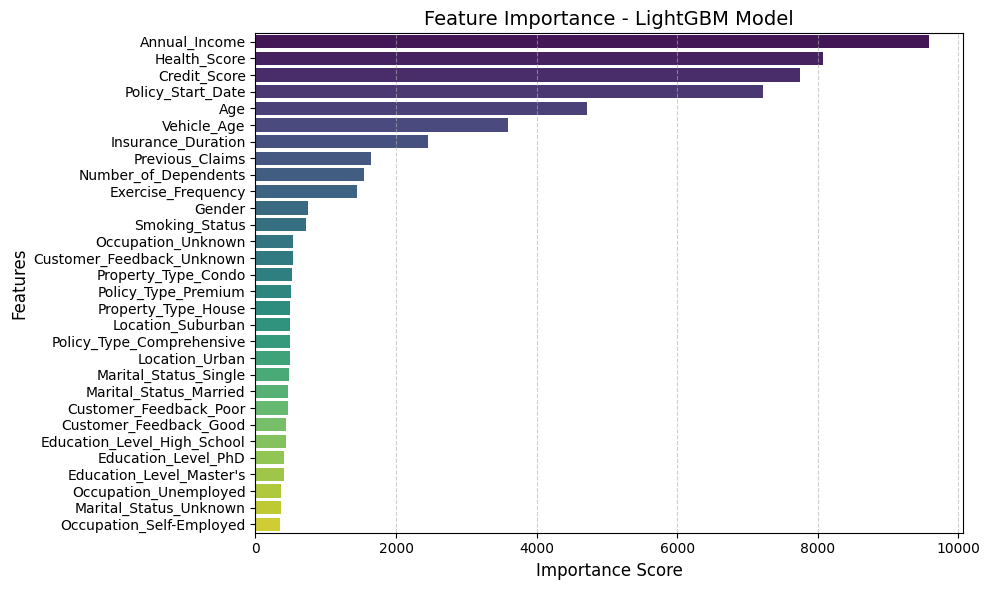

Top 10 Features by Importance:



,Feature,Importance
2,Annual_Income,9585
4,Health_Score,8073
7,Credit_Score,7747
9,Policy_Start_Date,7225
0,Age,4722
6,Vehicle_Age,3590
8,Insurance_Duration,2452
5,Previous_Claims,1645
3,Number_of_Dependents,1539
11,Exercise_Frequency,1450


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Extract feature importance from the trained LightGBM model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance,
    palette='viridis'
)
plt.title('Feature Importance - LightGBM Model', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display top 10 important features
print("Top 10 Features by Importance:\n")
display(feature_importance.head(10))

# CatBoost

In [ ]:
import optuna
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_log_error

In [ ]:
from catboost import Pool, CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

__init__(): khởi tạo X, y, hyperparam_bounds

_suggest_hyperparams(): hyperparams suggest for trial of a study

objective():
- Suggest hyperparams bound từ hàm _suggest_hyperparams()
- Dùng KFold: Mỗi fold train 1 CatBoostRegressor, evaluate trên oof, lưu RMSLE mỗi fold.
- Tính trung bình test error từ KFold
- Lưu danh sách params và RMSLE của trial  

In [ ]:
class CatBoostAndOptunaParams:
    def __init__(self, X, y, n_folds=10, hyperparam_bounds=None, random_state=86, task_type='GPU', verbose=0):
        self.X = X
        self.y = y
        self.n_folds = n_folds
        self.random_state = random_state
        self.task_type = task_type
        self.verbose = verbose
        self.hyperparam_bounds = hyperparam_bounds or {
            'iterations': (500, 800),
            'depth': (6, 9),
            'learning_rate': (0.05, 0.2),
            'l2_leaf_reg': (0.3, 1.0),
            'loss_function': ['RMSE']
        }

        # Placeholders
        self.hyperparams_history = []
        self._oof_predictions = []
        self.best_score = float('inf')

    def _suggest_hyperparams(self, trial):
        return {
            'iterations': trial.suggest_int('iterations', *self.hyperparam_bounds['iterations']),
            'depth': trial.suggest_int('depth', *self.hyperparam_bounds['depth']),
            'learning_rate': trial.suggest_float('learning_rate', *self.hyperparam_bounds['learning_rate'], log=True),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', *self.hyperparam_bounds['l2_leaf_reg'], log=True),
            'loss_function': trial.suggest_categorical('loss_function', self.hyperparam_bounds['loss_function'])
        }


    def objective(self, trial):

        params = self._suggest_hyperparams(trial)

        # Assigning string type variables to cat_features for fitting
        cat_features = [col for col in self.X.select_dtypes(include=['object', 'string']).columns]

        # K-Fold cross-validation
        folds = KFold(n_splits=self.n_folds, shuffle = True, random_state=self.random_state)
        fold_rmsle = []
        oof_preds = np.zeros(len(self.y))


        for fold, (train_idx, val_idx) in enumerate(folds.split(self.X, self.y)):
            X_train, y_train = self.X.iloc[train_idx], self.y.iloc[train_idx]
            X_val, y_val = self.X.iloc[val_idx], self.y.iloc[val_idx]

            # Model creation and training
            model = CatBoostRegressor(
                iterations =params['iterations'],
                depth =params['depth'],
                learning_rate =params['learning_rate'],
                loss_function =params['loss_function'],
                random_state =self.random_state,
                l2_leaf_reg =params['l2_leaf_reg'],
                task_type =self.task_type,
                verbose =self.verbose
            )
            model.fit(X_train, y_train, cat_features=cat_features)


            val_pred = model.predict(X_val)
            val_pred = np.maximum(0, val_pred) # Clipping prediction values

            # Getting oof predictions
            oof_preds[val_idx] = val_pred

            fold_rmsle.append(mean_squared_log_error(y_val, val_pred, squared = False))

        # Saving oof predictions
        self._oof_predictions.append(oof_preds.copy())


        # Calculating mean rmsle across folds
        mean_rmsle = np.mean(fold_rmsle)

        self.hyperparams_history.append({**params, 'RMSE': mean_rmsle})
        return mean_rmsle

    def optimize(self, n_trials=5, direction="minimize"):
        study = optuna.create_study(direction=direction)
        study.optimize(self.objective, n_trials=n_trials)
        self.best_params = study.best_params
        self.best_value = study.best_value
        return study

    @property
    def oof(self):
        if self._oof_predictions is None:
            raise ValueError("No OOF predictions available")
        return self._oof_predictions

    @property
    def history(self):
        if not self.hyperparams_history:
            raise ValueError("No hyperparameter history available")
        self.hyperparams_history = sorted(self.hyperparams_history, key=lambda x: x['RMSE'])
        return self.hyperparams_history
y_log1p = np.log1p(y)

## Start off with first study

--> Then use SHAP to identify which features contribute the most

## Select features

- Create Pool of train and valuation set
- Use CatBoostRegressor.select_features()
-

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=86)

y_train_log1p = np.log1p(y_train)
y_val_log1p = np.log1p(y_val)

cat_features = [col for col in X_train.select_dtypes(include=['object', 'string']).columns]

train_pool = Pool(X_train, y_train_log1p, feature_names = X_train.columns.tolist(), cat_features=cat_features)
val_pool = Pool(X_val, y_val_log1p, feature_names = X_val.columns.tolist(), cat_features=cat_features)

model = CatBoostRegressor(**first_study.best_params, random_state=86, task_type='GPU', verbose = 0, cat_features=cat_features)

summary = model.select_features(
    train_pool,
    eval_set=val_pool,
    features_for_select='0-29',
    num_features_to_select=14,
    steps=16,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=True,
    logging_level='Silent',
    plot=False
)

## CV test predictions

Cut study:
- Study lại từ tập data sau khi loại bỏ feature nhiễu/không có nhiều tác dụng
CV test prediction:
- Chia KFold: train CatBoostRegressor trên mỗi fold và lưu metric score lại
- Tính trung bình metric score của KFold -> final result

In [ ]:
#Function for creating oof predictions (on test data)
def cv_test_preds(X, y, X_test, hyperparams, n_folds=5, random_state=86, task_type='GPU', verbose=0):

    folds = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    test_preds = []

    for fold, (train_idx, val_idx) in enumerate(folds.split(X, y)):

        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]

        # Finding categorical features
        cat_features = [col for col in X.select_dtypes(include=['object', 'string']).columns]

        model = CatBoostRegressor(
            iterations=hyperparams[0]['iterations'],
            depth=hyperparams[0]['depth'],
            learning_rate=hyperparams[0]['learning_rate'],
            loss_function=hyperparams[0]['loss_function'],
            random_state=random_state,
            l2_leaf_reg=hyperparams[0]['l2_leaf_reg'],
            task_type=task_type,
            verbose=verbose
        )
        model.fit(X_train, y_train, cat_features=cat_features)

        # Making predictions
        test_preds.append(model.predict(X_test))

    return test_preds

In [ ]:
X_selected = X.drop(summary['eliminated_features_names'], axis = 1)
hyperparam_search = CatBoostAndOptunaParams(X_selected, y_log1p, n_folds = 5,
        hyperparam_bounds = {
            'iterations': (500,800),
            'depth': (6, 8),
            'learning_rate': (0.05, 0.2),
            'l2_leaf_reg': (0.4, 1.0),
            'loss_function': ['RMSE']
        })


cut_study = hyperparam_search.optimize(n_trials=5)

print("Best Parameters:", cut_study.best_params)
print("Best RMSLE:", cut_study.best_value)

In [ ]:
X_final_preds = cv_test_preds(X_selected, y_log1p, X_test.drop(summary['eliminated_features_names'], axis =1), hyperparam_search.history,
                              n_folds = 5)

y_pred = sum(np.expm1(X_final_preds))/len(X_final_preds)

# StackingRegressor (CatBoost + LightGBM + RandomForest)

## CatBoost

In [ ]:
from catboost import Pool, CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

In [ ]:
class CatBoostAndOptunaParams:
    def __init__(self, X, y, n_folds=10, hyperparam_bounds=None, random_state=86, task_type='GPU', verbose=0):
        self.X = X
        self.y = y
        self.n_folds = n_folds
        self.random_state = random_state
        self.task_type = task_type
        self.verbose = verbose
        self.hyperparam_bounds = hyperparam_bounds or {
            'iterations': (500, 800),
            'depth': (6, 9),
            'learning_rate': (0.05, 0.2),
            'l2_leaf_reg': (0.3, 1.0),
            'loss_function': ['RMSE']
        }

        # Placeholders
        self.hyperparams_history = []
        self._oof_predictions = []
        self.best_score = float('inf')

    def _suggest_hyperparams(self, trial):
        return {
            'iterations': trial.suggest_int('iterations', *self.hyperparam_bounds['iterations']),
            'depth': trial.suggest_int('depth', *self.hyperparam_bounds['depth']),
            'learning_rate': trial.suggest_float('learning_rate', *self.hyperparam_bounds['learning_rate'], log=True),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', *self.hyperparam_bounds['l2_leaf_reg'], log=True),
            'loss_function': trial.suggest_categorical('loss_function', self.hyperparam_bounds['loss_function'])
        }


    def objective(self, trial):

        params = self._suggest_hyperparams(trial)

        # Assigning string type variables to cat_features for fitting
        cat_features = [col for col in self.X.select_dtypes(include=['object', 'string']).columns]

        # K-Fold cross-validation
        folds = KFold(n_splits=self.n_folds, shuffle = True, random_state=self.random_state)
        fold_rmsle = []
        oof_preds = np.zeros(len(self.y))


        for fold, (train_idx, val_idx) in enumerate(folds.split(self.X, self.y)):
            X_train, y_train = self.X.iloc[train_idx], self.y.iloc[train_idx]
            X_val, y_val = self.X.iloc[val_idx], self.y.iloc[val_idx]

            # Model creation and training
            model = CatBoostRegressor(
                iterations =params['iterations'],
                depth =params['depth'],
                learning_rate =params['learning_rate'],
                loss_function =params['loss_function'],
                random_state =self.random_state,
                l2_leaf_reg =params['l2_leaf_reg'],
                task_type =self.task_type,
                verbose =self.verbose
            )
            model.fit(X_train, y_train, cat_features=cat_features)


            val_pred = model.predict(X_val)
            val_pred = np.maximum(0, val_pred) # Clipping prediction values

            # Getting oof predictions
            oof_preds[val_idx] = val_pred


            fold_rmsle.append(mean_squared_log_error(y_val, val_pred, squared = False))

        # Saving oof predictions
        self._oof_predictions.append(oof_preds.copy())


        # Calculating mean rmsle across folds
        mean_rmsle = np.mean(fold_rmsle)

        self.hyperparams_history.append({**params, 'RMSE': mean_rmsle})
        return mean_rmsle

    def optimize(self, n_trials=5, direction="minimize"):
        study = optuna.create_study(direction=direction)
        study.optimize(self.objective, n_trials=n_trials)
        self.best_params = study.best_params
        self.best_value = study.best_value
        return study

    @property
    def oof(self):
        if self._oof_predictions is None:
            raise ValueError("No OOF predictions available")
        return self._oof_predictions

    @property
    def history(self):
        if not self.hyperparams_history:
            raise ValueError("No hyperparameter history available")
        self.hyperparams_history = sorted(self.hyperparams_history, key=lambda x: x['RMSE'])
        return self.hyperparams_history

In [ ]:
y_log1p = np.log1p(y)

hyperparam_search_1 = CatBoostAndOptunaParams(X, y_log1p, n_folds = 5)
first_study = hyperparam_search_1.optimize(n_trials=5)
hyperparam_search_2 = CatBoostAndOptunaParams(X, y_log1p, n_folds = 5)
second_study = hyperparam_search_2.optimize(n_trials=5)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=86)

y_train_log1p = np.log1p(y_train)
y_val_log1p = np.log1p(y_val)

cat_features = [col for col in X_train.select_dtypes(include=['object', 'string']).columns]

train_pool = Pool(X_train, y_train_log1p, feature_names = X_train.columns.tolist(), cat_features=cat_features)
val_pool = Pool(X_val, y_val_log1p, feature_names = X_val.columns.tolist(), cat_features=cat_features)

cat_1 = CatBoostRegressor(**first_study.best_params, random_state=86, task_type='GPU', verbose = 0, cat_features=cat_features)
cat_2 = CatBoostRegressor(**second_study.best_params, random_state=86, task_type='GPU', verbose = 0, cat_features=cat_features)

## LightGBM

In [ ]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

In [ ]:
def objective_LGBM(trial):
  #Define param
  param = {
      "objective": "regression",
      "metric": "rmse",
      "boosting_type": "gbdt",
      "device": "gpu",
      "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
      "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
      "max_depth": trial.suggest_int("max_depth", 3, 15),
      "num_leaves": trial.suggest_int("num_leaves", 20, 300),
      "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
      "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
      "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
      "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 3.0),
      "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 3.0),
      "verbose": -1  # Suppress warnings and messages
  }

  X_train_split, X_val, y_train_split, y_val = train_test_split(X, y_log, test_size=0.2, random_state=86)

  model = lgb.LGBMRegressor(**param)
  model.fit(X_train_split, y_train_split, eval_set=[(X_val, y_val)], callbacks=[early_stopping(stopping_rounds=30, verbose=False), log_evaluation(10)])

  y_pred = model.predict(X_val)
  rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

  return rmsle

In [ ]:
third_study = optuna.create_study(direction="minimize")
third_study.optimize(objective_LGBM, n_trials=10)
fourth_study = optuna.create_study(direction="minimize")
fourth_study.optimize(objective_LGBM, n_trials=10)

In [ ]:
best_params_lgbm_1 = third_study.best_params
best_params_lgbm_1["objective"] = "regression"
best_params_lgbm_1["metric"] = "rmse"
best_params_lgbm_1["device"] = "gpu"

best_params_lgbm_2 = fourth_study.best_params
best_params_lgbm_2["objective"] = "regression"
best_params_lgbm_2["metric"] = "rmse"
best_params_lgbm_2["device"] = "gpu"

# Train the final model
lgbm_1 = lgb.LGBMRegressor(**best_params_lgbm_1)
lgbm_2 = lgb.LGBMRegressor(**best_params_lgbm_2)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_params = {'n_estimators': 423, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}
rf = RandomForestRegressor(**rf_params)

## Stacking all three models

In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [ ]:
def cv_test_preds(X, y, X_test, n_folds=5, random_state=86, task_type='GPU', verbose=0):

    folds = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    test_preds = []

    for fold, (train_idx, val_idx) in enumerate(folds.split(X, y)):
        print(f"Current fold: {fold}...")
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]

        cat_features = [col for col in X.select_dtypes(include=['object', 'string']).columns]

        # model = StackingRegressor(estimators=[('cat_2', cat_2), ('lgbm_1', lgbm_1), ('lgbm_2', lgbm_2), ('rf', rf)],
        #                          final_estimator=cat_1,
        #                          n_jobs = -1)
        model = StackingRegressor(estimators=[('cat_1', cat_1), ('lgbm_1', lgbm_1)],
                                 final_estimator=rf)
        model.fit(X_train, y_train)

        test_preds.append(model.predict(X_test))

    return test_preds

In [ ]:
X_final_preds = cv_test_preds(X, y_log1p, X_test, n_folds = 5)

y_pred = sum(np.expm1(X_final_preds))/len(X_final_preds)

# Submission

In [ ]:
submission = pd.DataFrame({"id": X_test.index, 'Premium Amount': y_pred})

print(submission.head(10))

submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")